# <center> TP 4 : Apprentissage non supervisé: PCA et clustering

Dans ce TP, vous allez découvrir le fonctionnement des méthodes observées précédemment : K-means, modèle de mélange gaussien (GMM) et clustering agglomératif, dans les tâches de clustering sur les données synthétiques.

Puis il vous faudra appliquer ses méthodes du clustering aux jeux de données réelles MNIST (tâche de reconnaissance manuscrite de chiffres).

**Votre travail consiste à écrire du code et effectuer des calculs dans les cellules ci-dessous.**

In this lab, you will discover how the methods observed previously: K-means, Gaussian mixture model (GMM) and agglomerative clustering work in clustering tasks on synthetic data.

Then you will have to apply its clustering methods to real MNIST datasets (handwritten digit recognition task).

**Your job is to write code and perform calculations in the cells below.**

Tout d'abord, nous allons initialiser l'environnement, importons tout les bibliothèques nécessaires

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns 
sns.set()
# sns.set(style='white')

from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

from mpl_toolkits.mplot3d import Axes3D

from IPython.display import Image
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1. K-means, GMM et clustering agglomératif pour le clustering : données synthétiques

Dans cette partie de TP vous allez appliquer les méthodes du clustering indiquées aux jeux de données synthétiques ci-dessous.

In this part of the lab you will apply the clustering methods indicated to the synthetic datasets below.

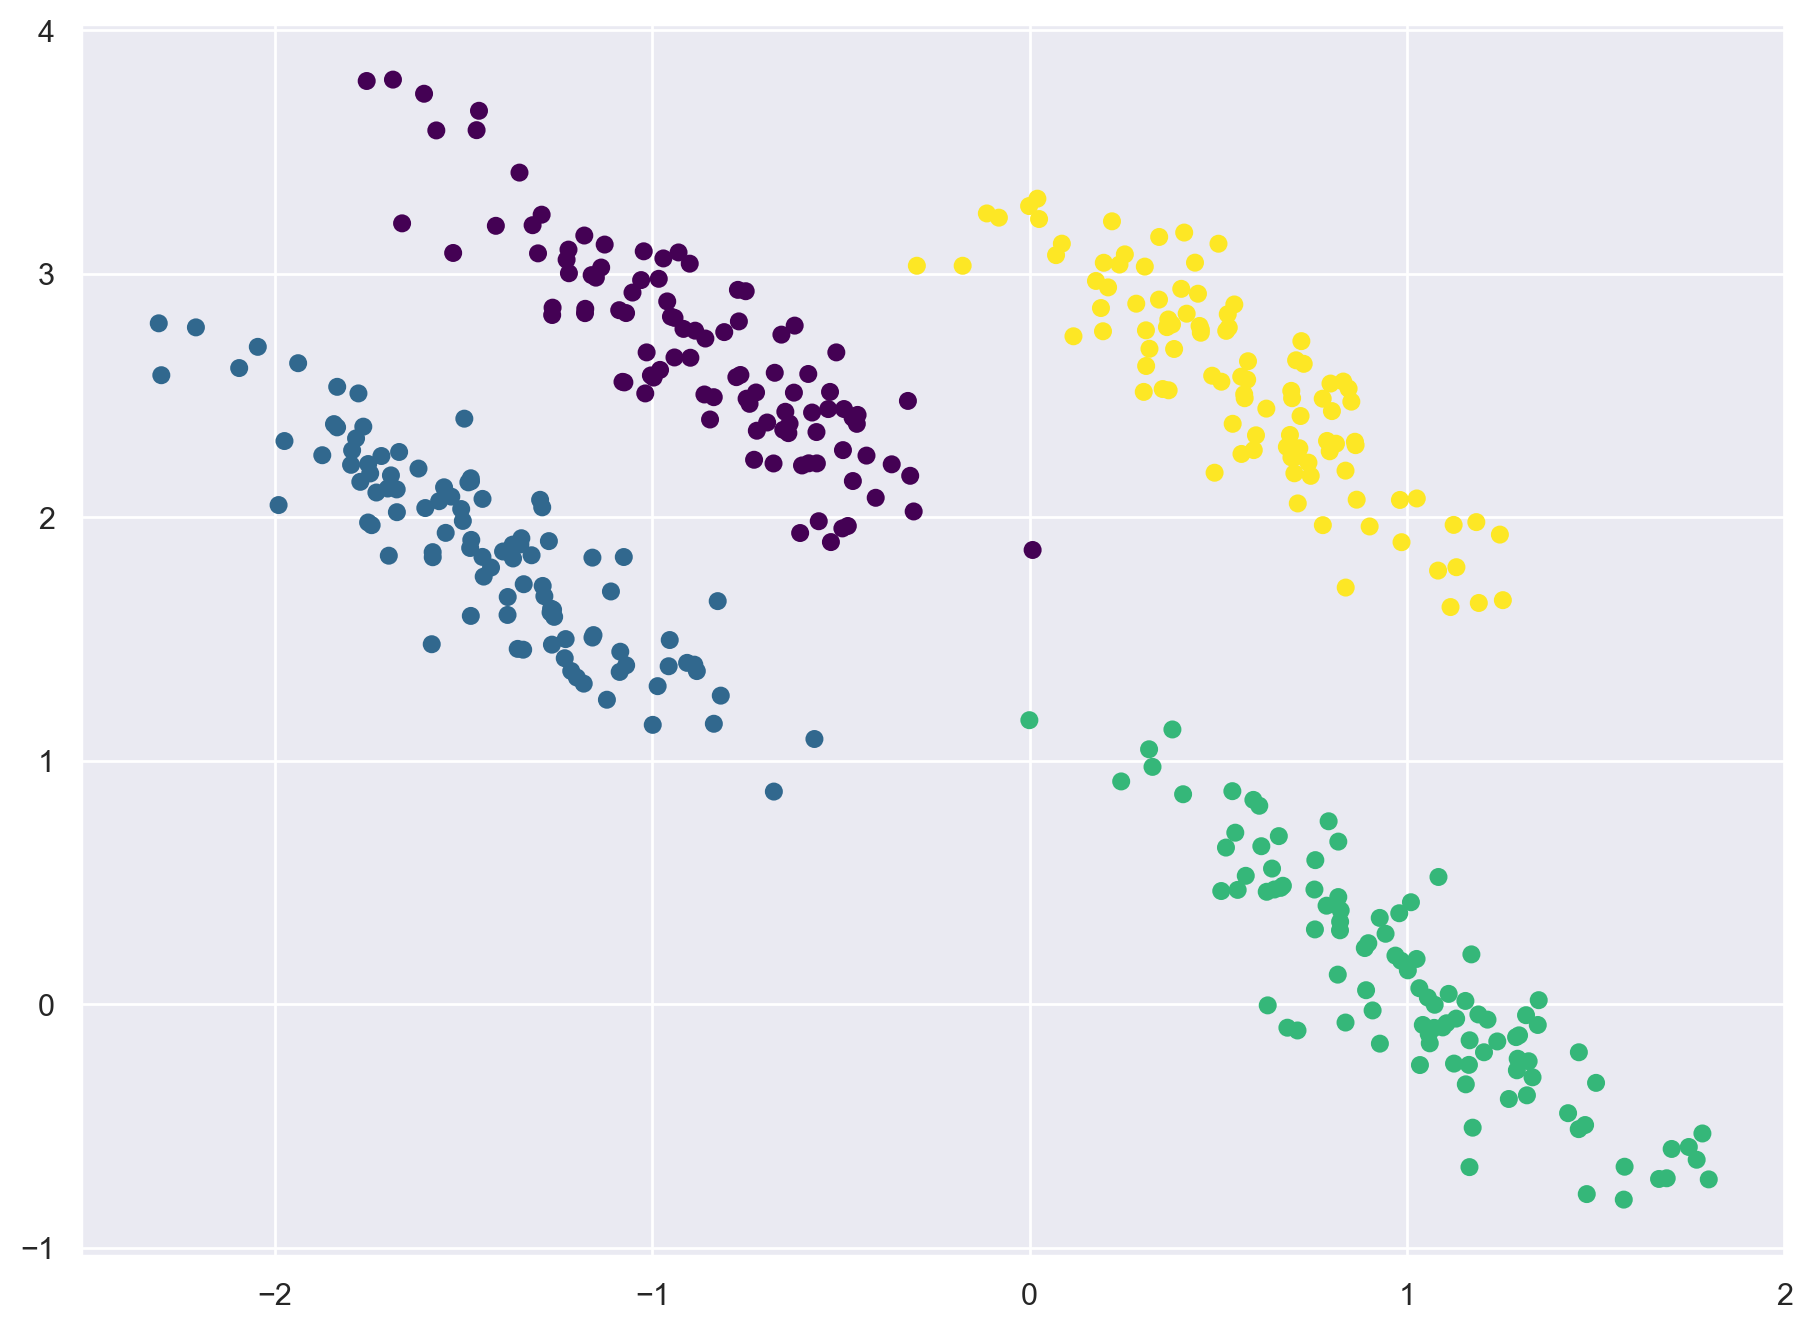

In [2]:
from sklearn.datasets import make_blobs

### 4 ordinary round clusters
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.50, random_state=0)

### 4 ordinary elliptical clusters
rng = np.random.RandomState(13)
X1 = np.dot(X, rng.randn(2, 2))
y1_true = y_true 
plt.scatter(X1[:, 0], X1[:, 1], s=30, cmap='viridis', c = y1_true);

In [3]:
X1.shape, y1_true.shape

((400, 2), (400,))

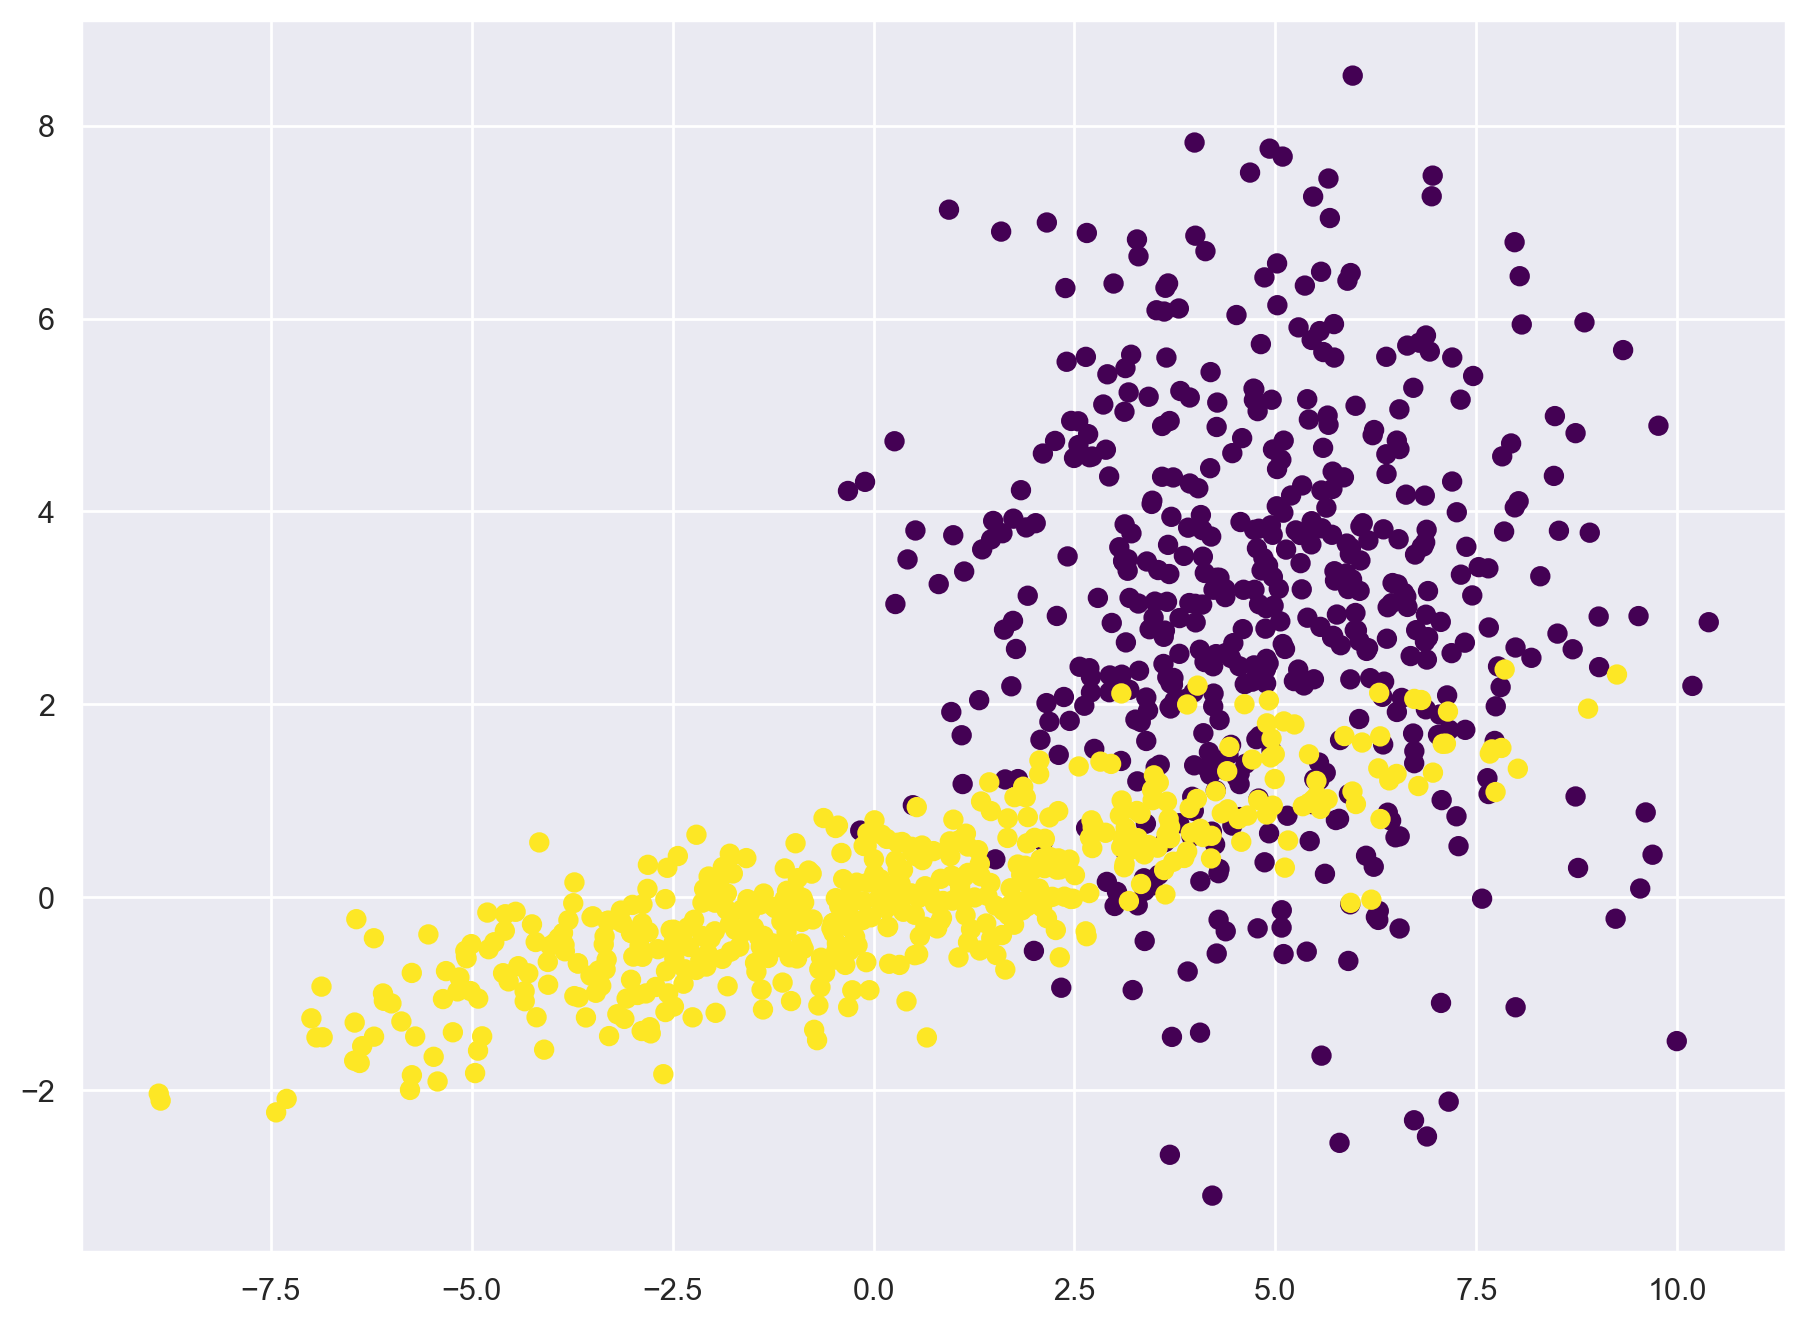

In [4]:
### 2 clusters with different gaussian distributions
np.random.seed(0)
n_samples = 500
X2_1 = 2.0*np.random.randn(n_samples, 2) + np.array([5, 3])
y2_1 = np.zeros(n_samples)
C = np.array([[0., -0.5], [3.5, .7]])
X2_2 = np.dot(np.random.randn(n_samples, 2), C)
y2_2 = np.ones(n_samples)

X2 = np.vstack([X2_1, X2_2])
y2_true = np.hstack([y2_1, y2_2])

plt.scatter(X2[:, 0], X2[:, 1], s=40, cmap='viridis', c = y2_true);

In [5]:
X2.shape, y2_true.shape

((1000, 2), (1000,))

**Ex. 1, 2** : 
Séparez en clusters différents les données {X1} et {X2} en entraînant les methodes [`K-means`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [`GMM`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) et [`clustering agglomératif`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) via sklearn. 

Visualisez avec les couleurs différentes les clusters obtenus et les positions de `centers` (ou `means`). Calculez les mesures de qualité du clustering : [`ARI`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html),	[`AMI`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html),	[`Homogenity`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html),	[`Completeness`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html),	[`V-measure`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html) et	[`Silhouette`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). 

Quelle méthode a la meilleure performance pour chaque exemple de données ?

**Ex. 1, 2**:
Separate the data {X1} and {X2} into different clusters by training the methods [`K-means`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [`GMM`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) and [`agglomerative clustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) via sklearn.

Visualize with the different colors the clusters obtained and the positions of `centers` (or `means`). Calculate clustering quality metrics: [`ARI`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html), [`AMI`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html), [`Homogenity`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html) , [`Completeness`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html), [`V-measure`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html) and [`Silhouette`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

Which method has the best performance for each sample data?

In [6]:
# You code here
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

algorithms = []
algorithms.append(KMeans(n_clusters=4, random_state=1))
algorithms.append(AgglomerativeClustering(n_clusters=4))
algorithms.append(GaussianMixture(n_components=4))

In [7]:
data = []
labels_all = []
centr_all = []
for algo in algorithms:
    labels = algo.fit_predict(X1)
    labels_all.append(labels)
    centr_all.append(
        np.stack((
          np.mean(X1[labels == 0, :], axis=0), #center of all clusters (for vis)
          np.mean(X1[labels == 1, :], axis=0),
          np.mean(X1[labels == 2, :], axis=0),
          np.mean(X1[labels == 3, :], axis=0)
      ))
    )
    data.append(({
        'ARI': metrics.adjusted_rand_score(y1_true, labels),
        'AMI': metrics.adjusted_mutual_info_score(y1_true, labels),
        'Homogenity': metrics.homogeneity_score(y1_true, labels),
        'Completeness': metrics.completeness_score(y1_true, labels),
        'V-measure': metrics.v_measure_score(y1_true, labels),
        'Silhouette': metrics.silhouette_score(X1, labels)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means','Agglomerative', 'GaussianMixture'])

results

ARI       AMI  Homogenity  Completeness  V-measure  \
K-means          0.960676  0.949031    0.949389      0.949509   0.949449   
Agglomerative    1.000000  1.000000    1.000000      1.000000   1.000000   
GaussianMixture  1.000000  1.000000    1.000000      1.000000   1.000000   

                 Silhouette  
K-means            0.549361  
Agglomerative      0.549338  
GaussianMixture    0.549338

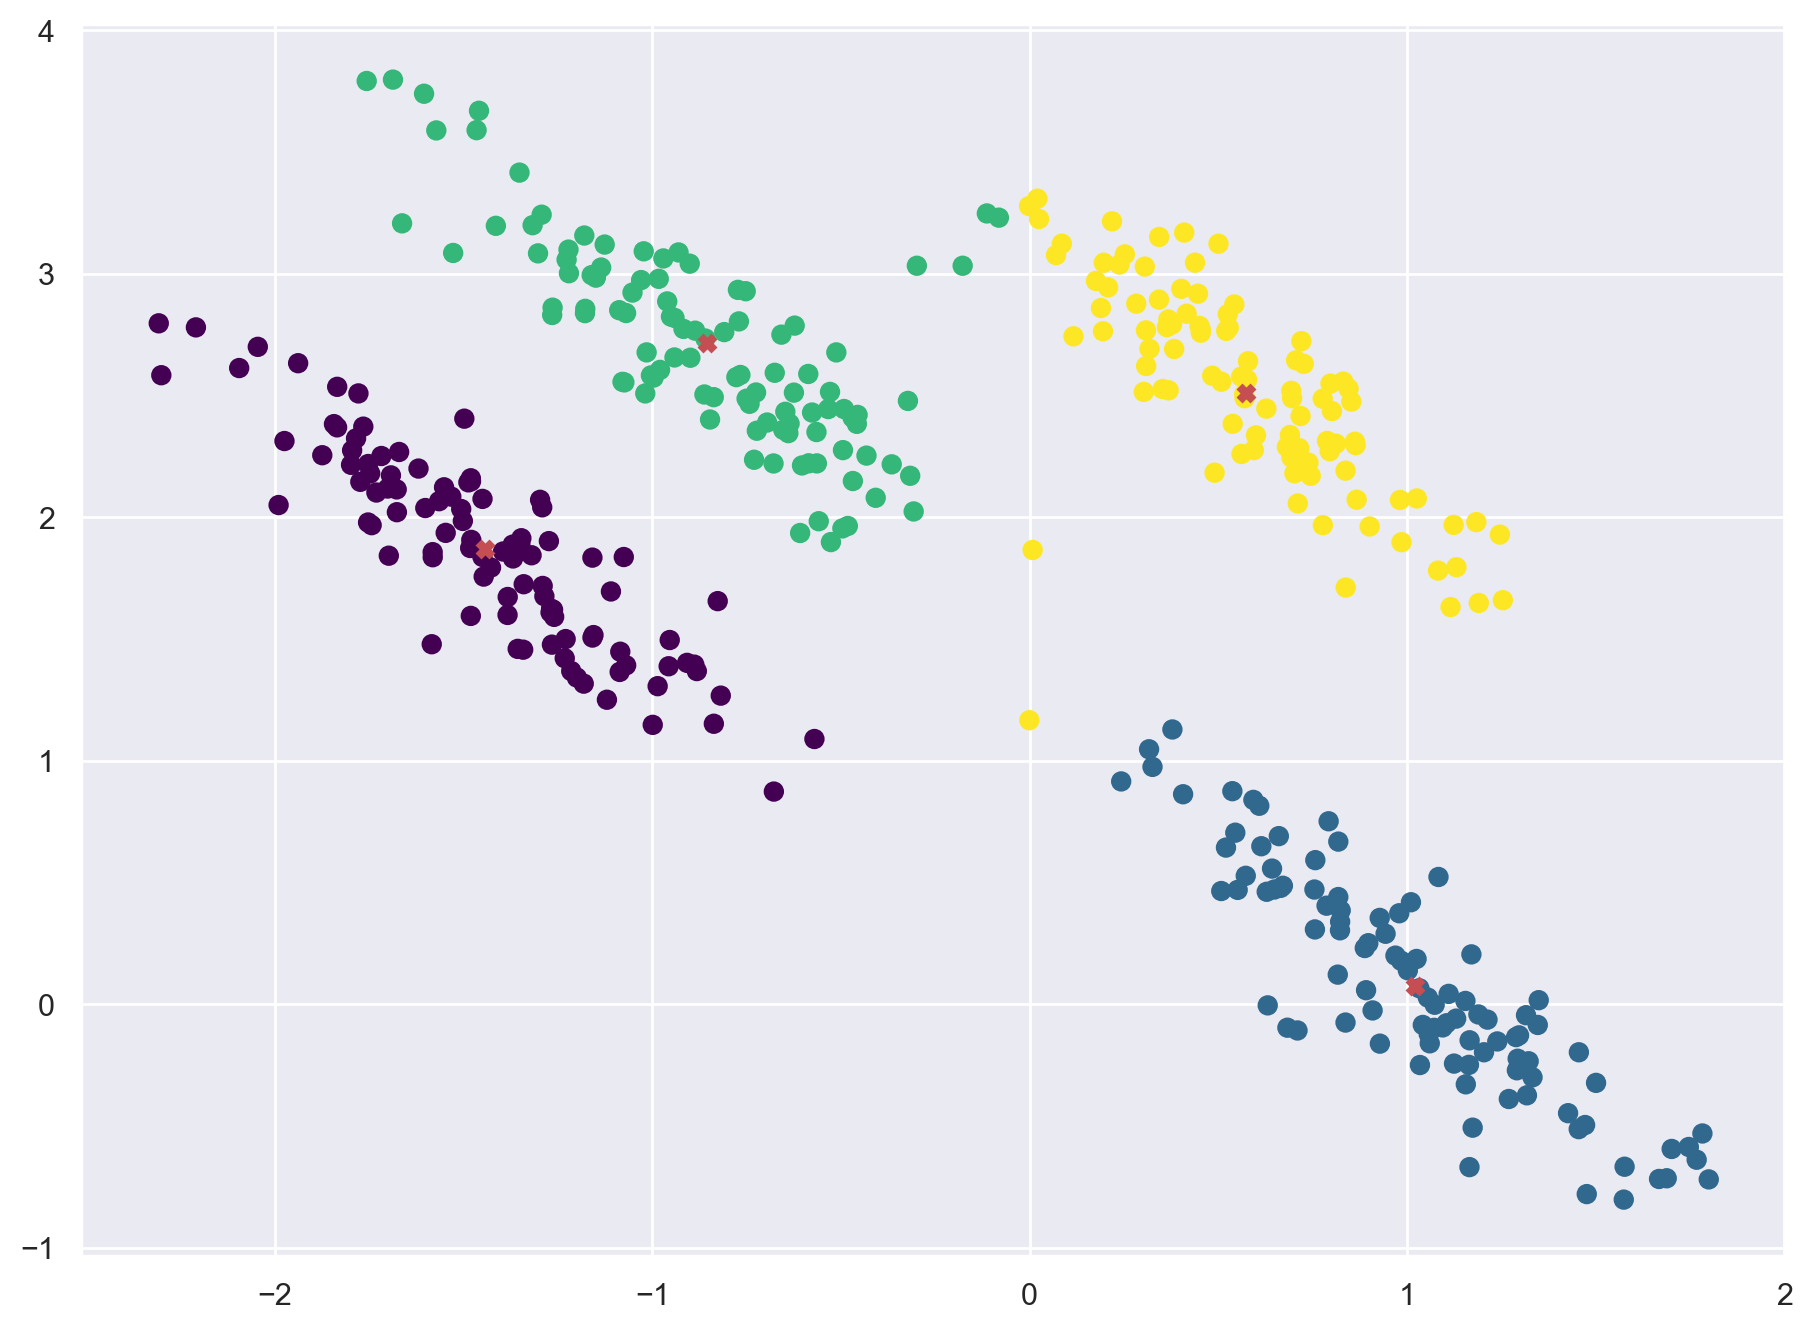

In [8]:
plt.plot(centr_all[0][:, 0], centr_all[0][:, 1], 'rX')
plt.scatter(X1[:, 0], X1[:, 1], c=labels_all[0], s=40, cmap='viridis')

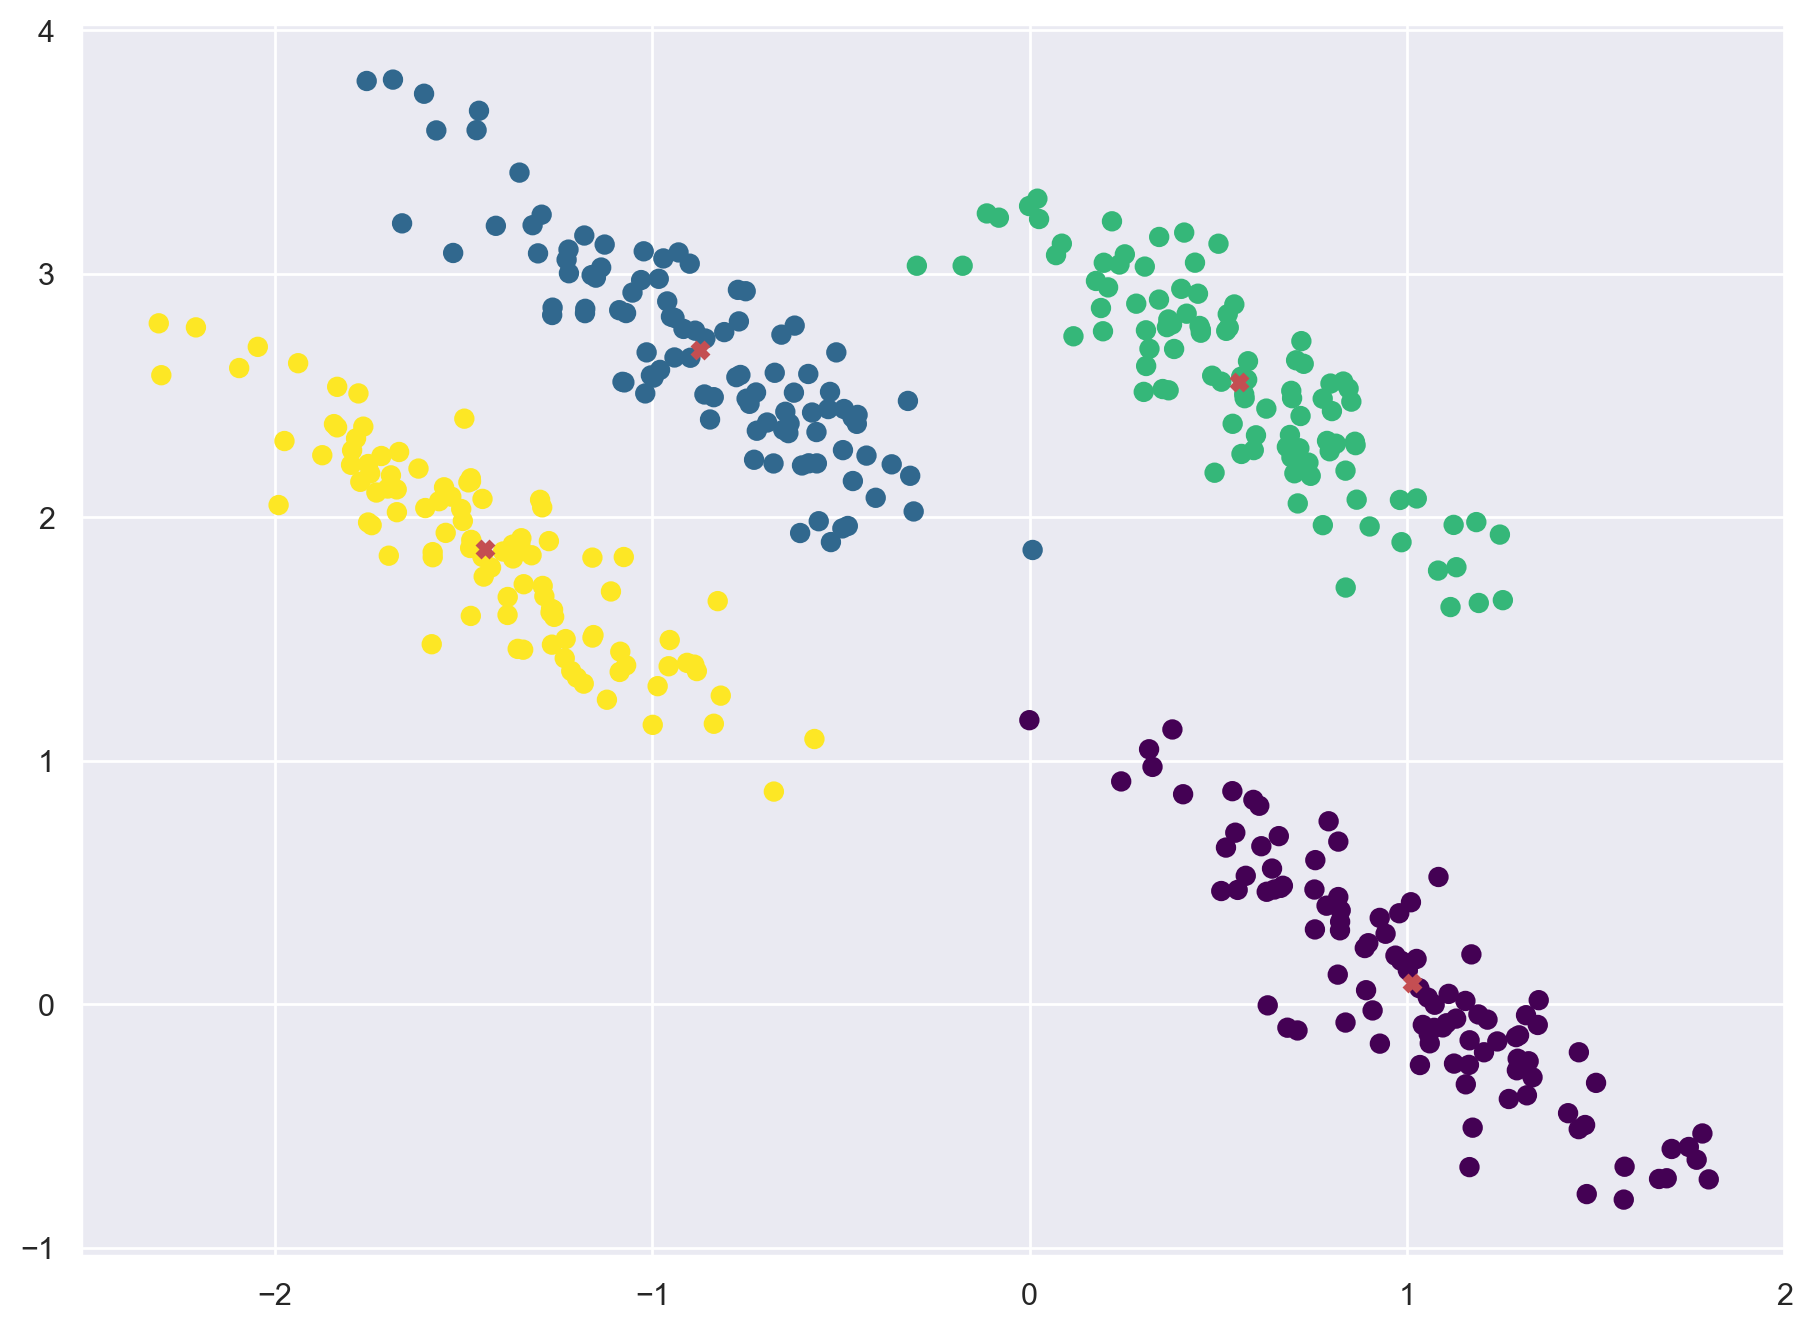

In [9]:
plt.plot(centr_all[1][:, 0], centr_all[1][:, 1], 'rX')
plt.scatter(X1[:, 0], X1[:, 1], c=labels_all[1], s=40, cmap='viridis')

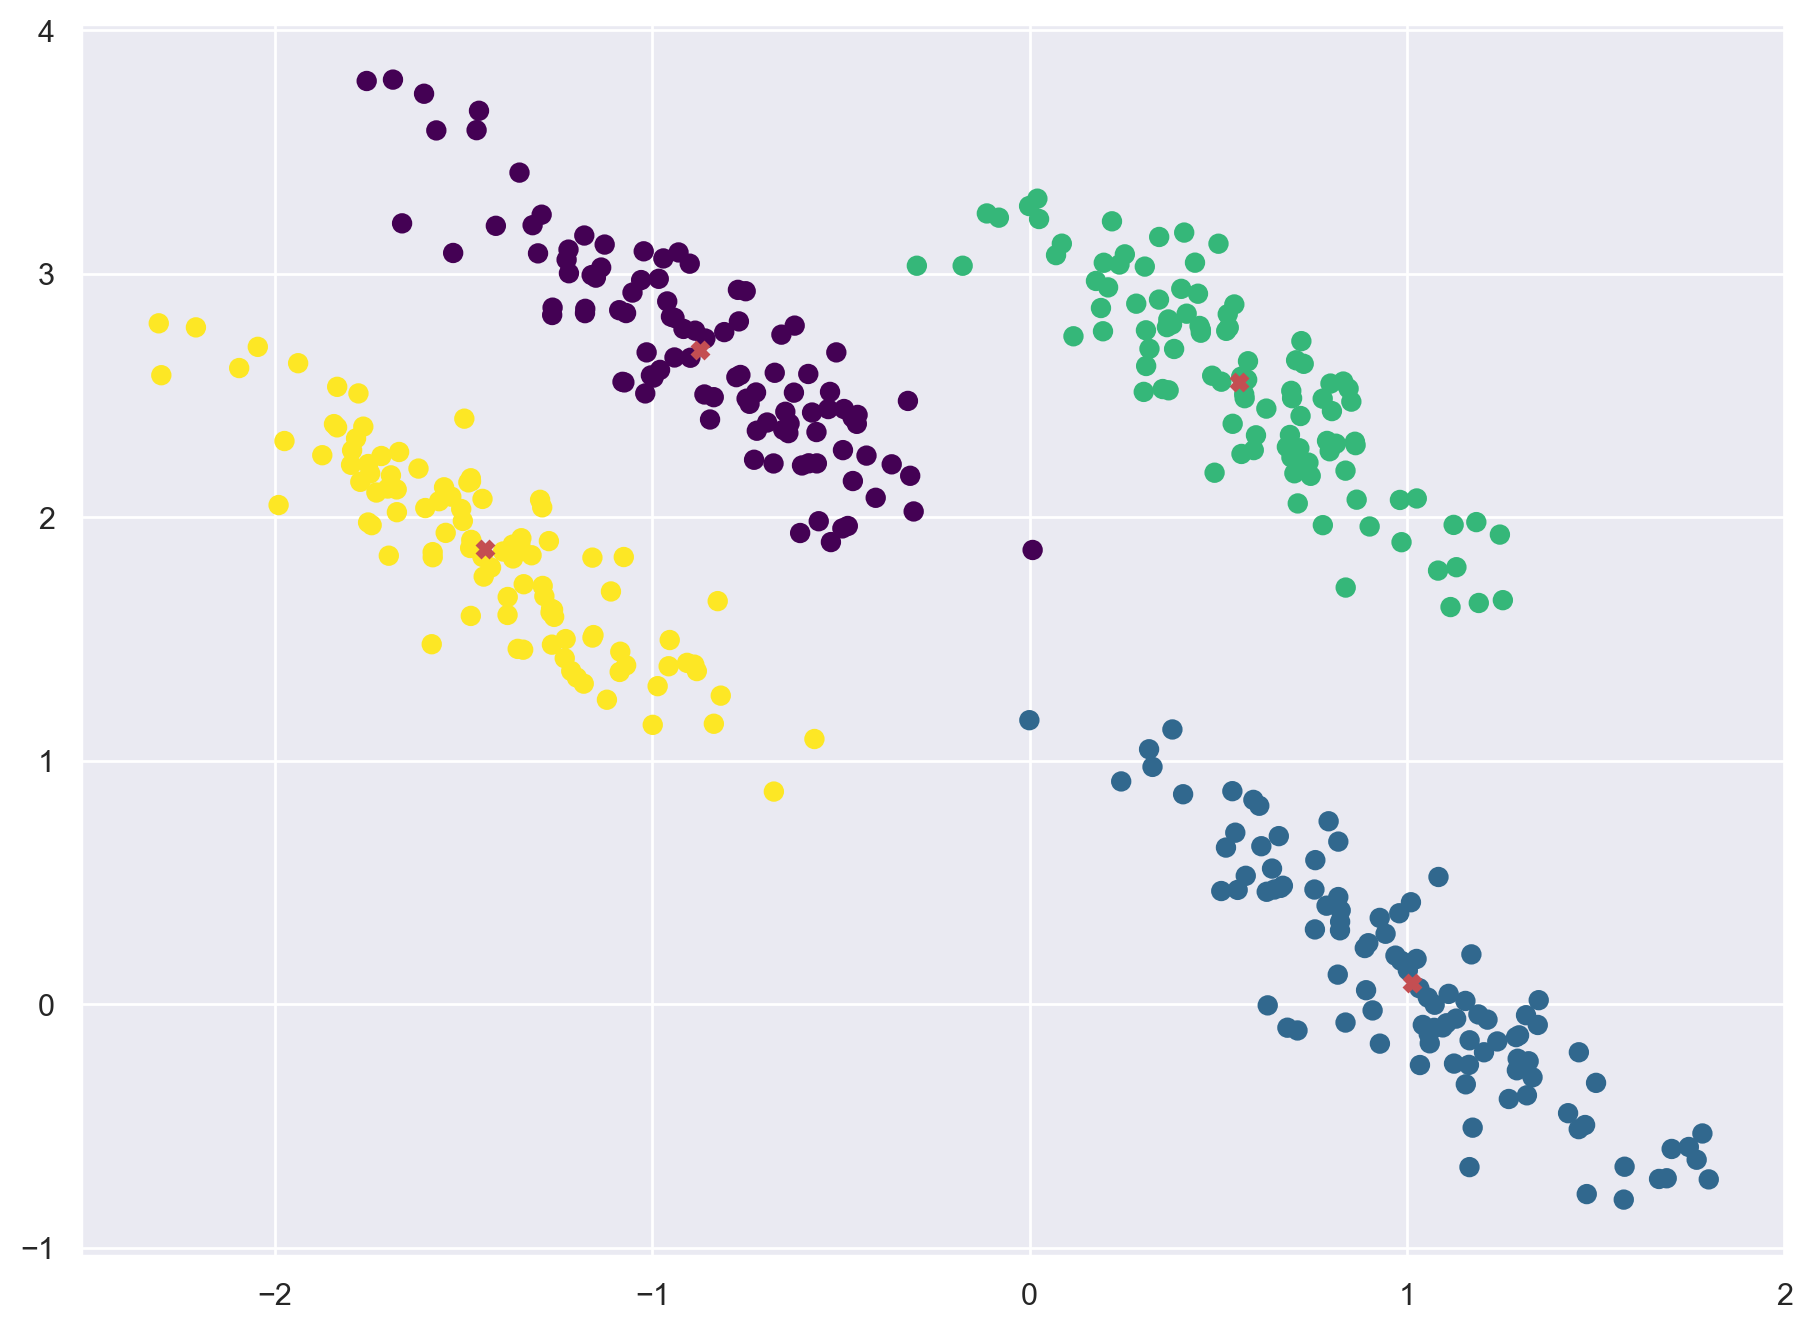

In [10]:
plt.plot(centr_all[2][:, 0], centr_all[2][:, 1], 'rX')
plt.scatter(X1[:, 0], X1[:, 1], c=labels_all[2], s=40, cmap='viridis')

In [11]:
from matplotlib.patches import Ellipse
import numpy as np
import matplotlib.pyplot as plt

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ellipse = Ellipse(xy=position, width=nsig * width, height=nsig * height, 
                          angle=angle, **kwargs)
        ax.add_patch(ellipse)
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=(w * w_factor))


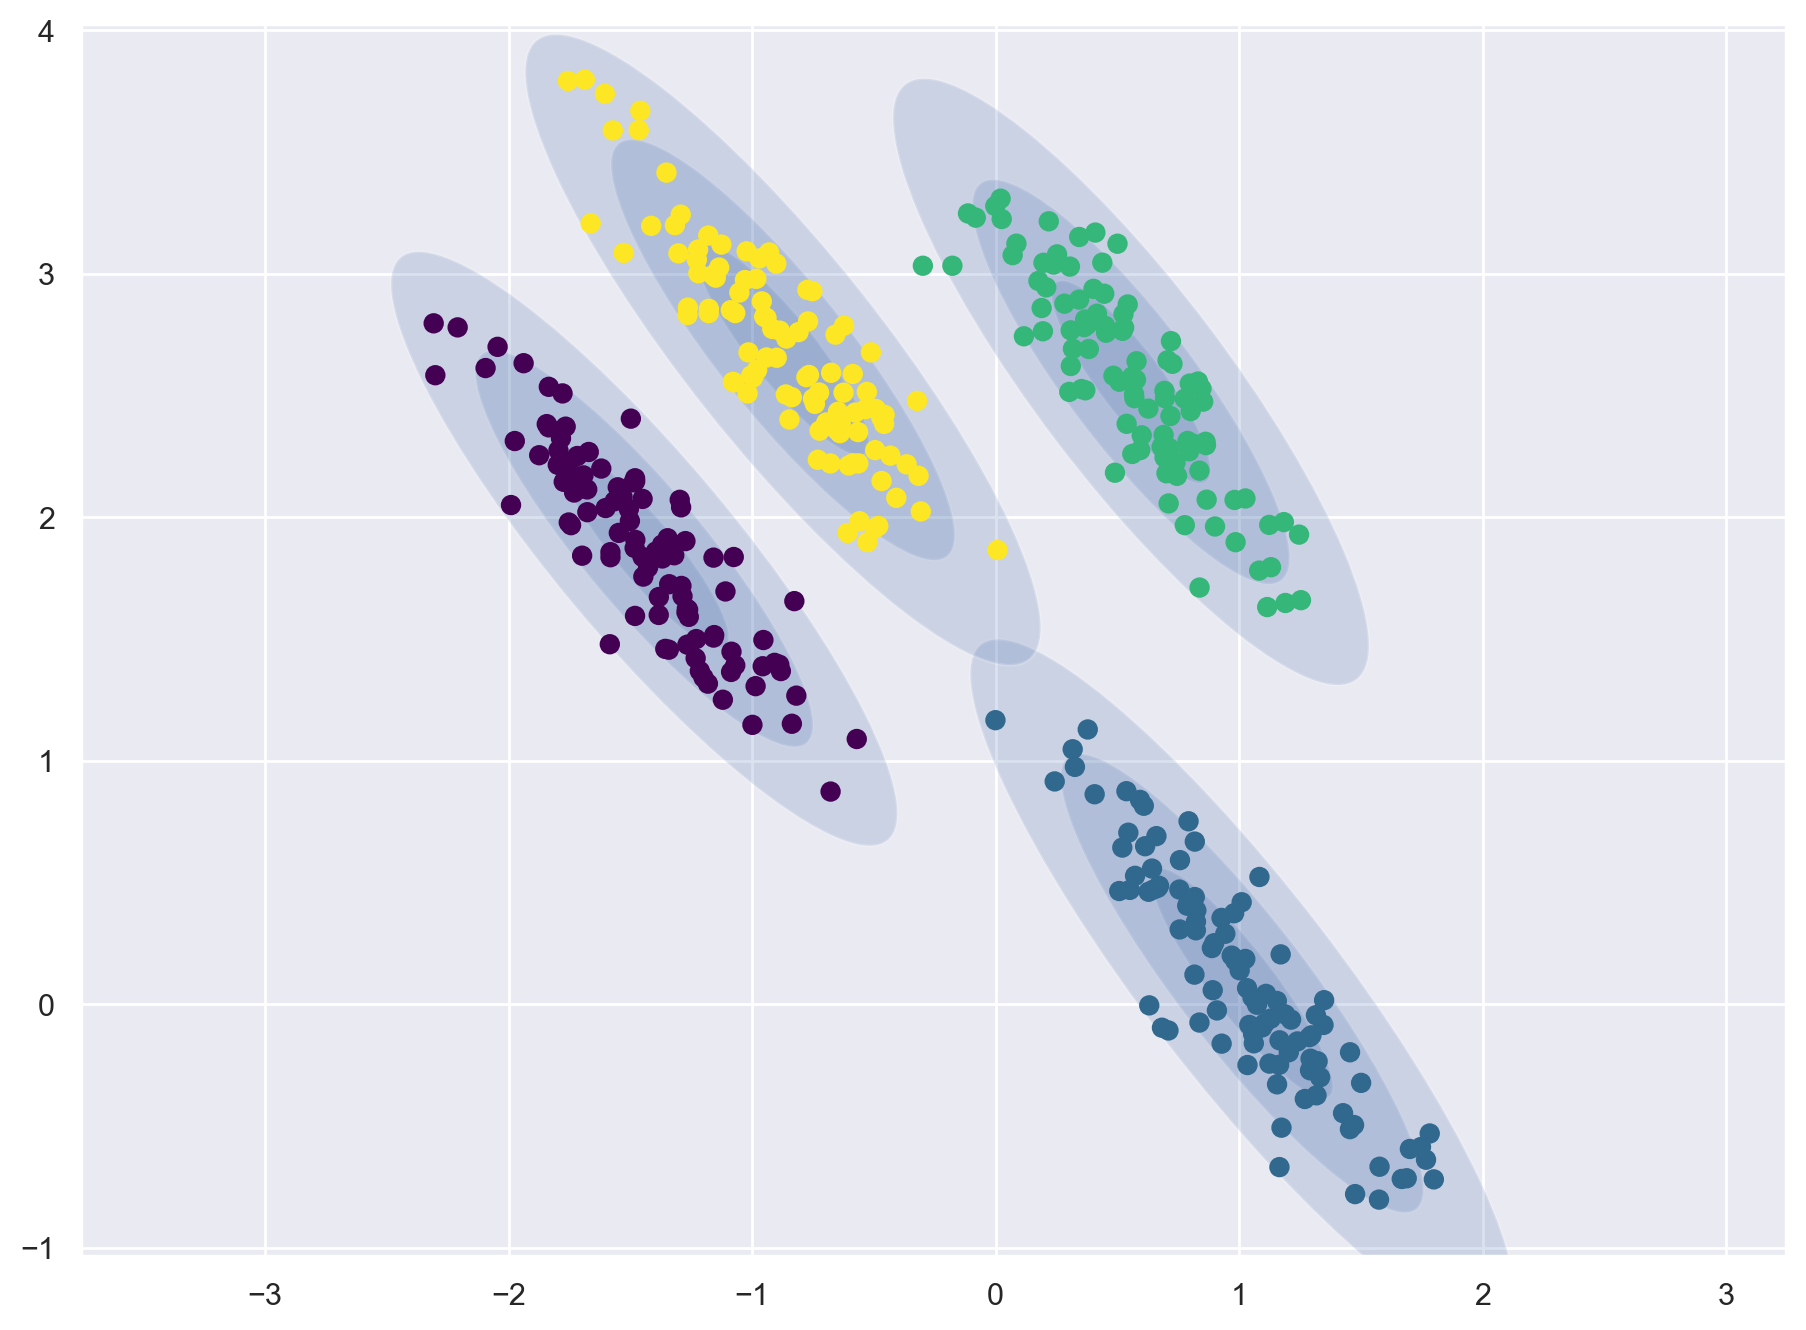

In [12]:
gmm = GaussianMixture(n_components=4).fit(X1)
plot_gmm(gmm, X1)

In [13]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

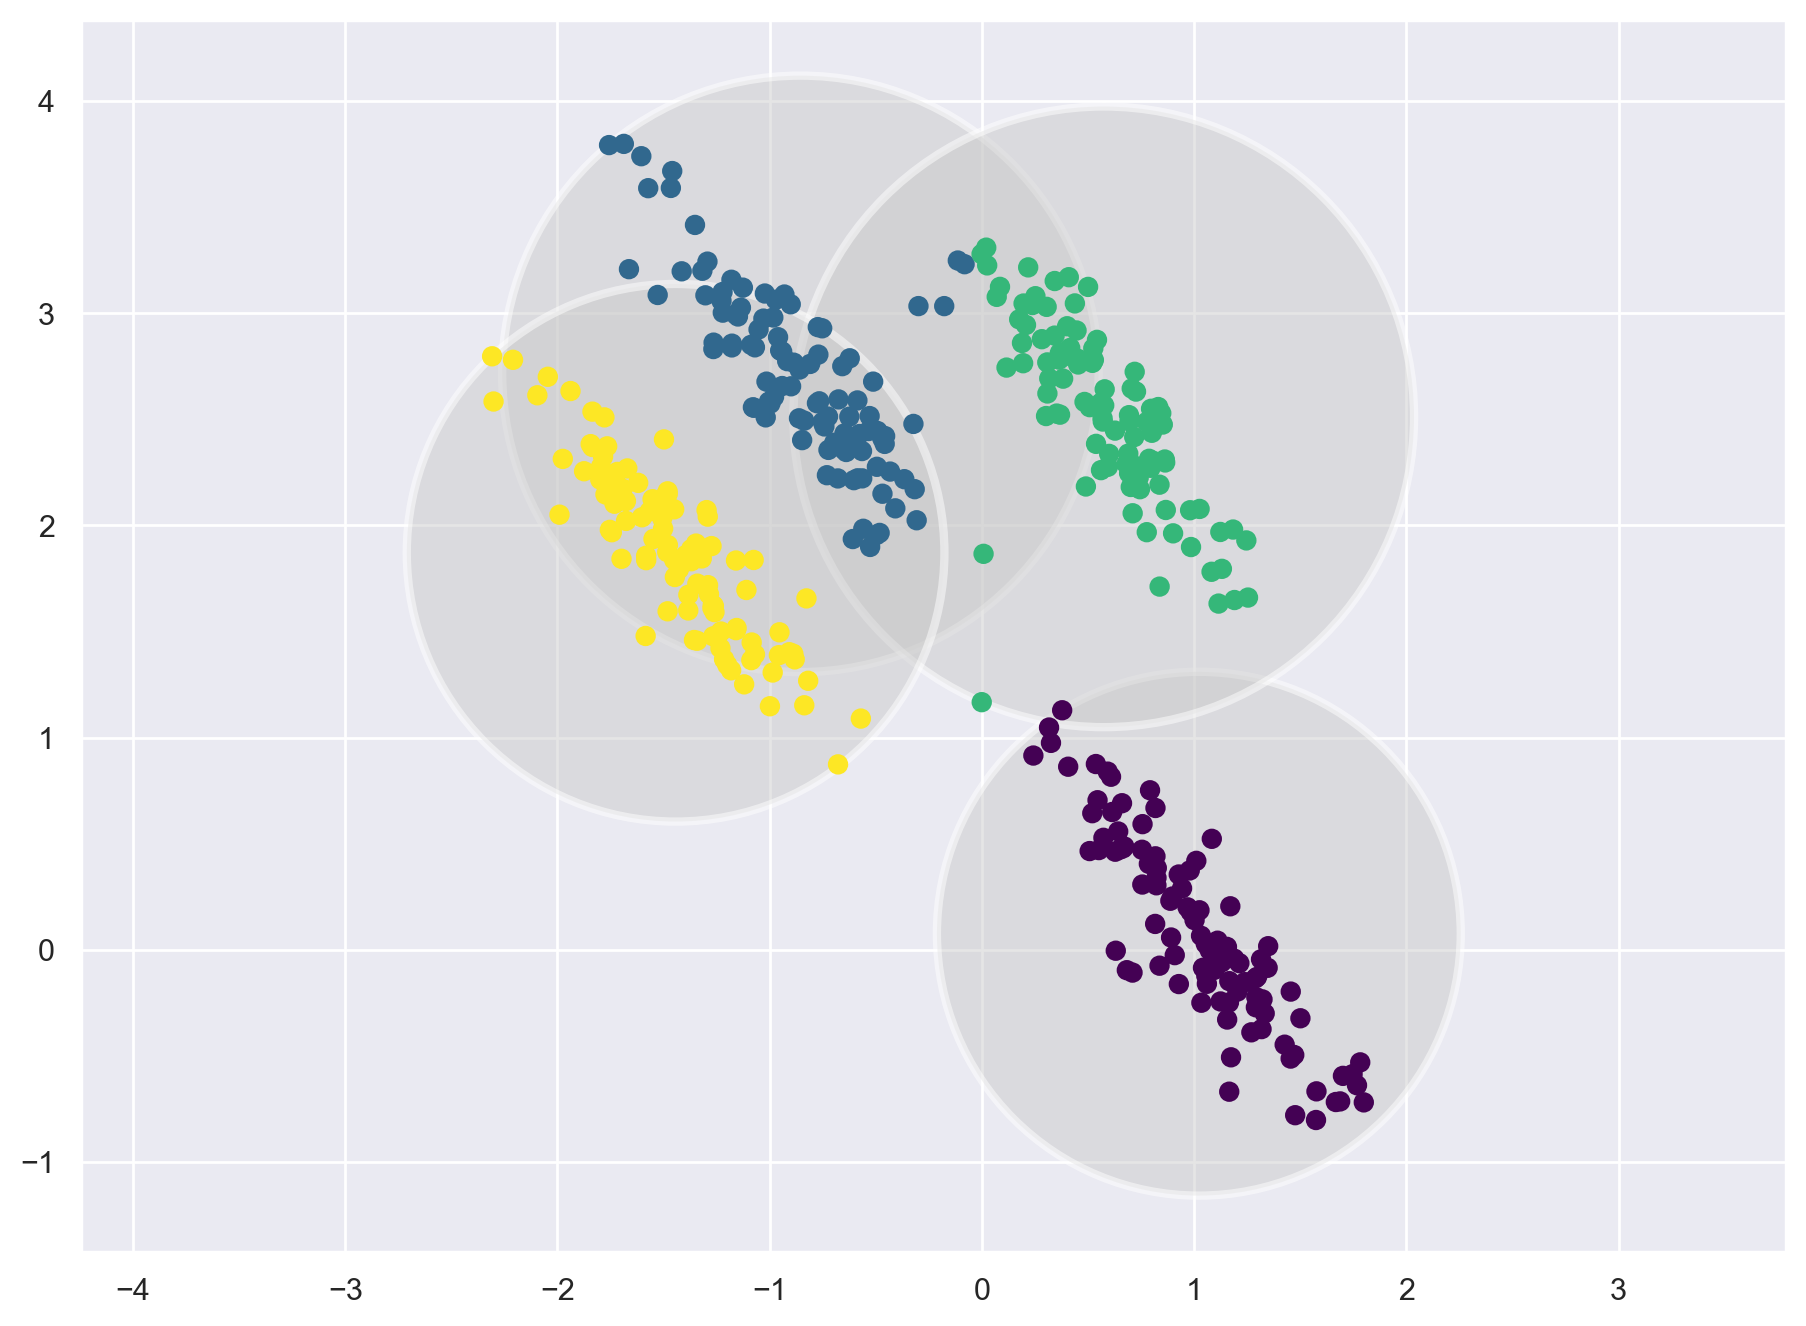

In [14]:
kmeans = KMeans(n_clusters=4)
plot_kmeans(kmeans, X1, n_clusters=4)

In [15]:
algorithms = []
algorithms.append(KMeans(n_clusters=2, random_state=1))
algorithms.append(AgglomerativeClustering(n_clusters=2))
algorithms.append(GaussianMixture(n_components=2))

In [16]:
data = []
labels_all = []
centr_all = []
for algo in algorithms:
    labels = algo.fit_predict(X2)
    labels_all.append(labels)
    centr_all.append(
        np.stack((
          np.mean(X2[labels == 0, :], axis=0),
          np.mean(X2[labels == 1, :], axis=0)
      ))
    )
    data.append(({
        'ARI': metrics.adjusted_rand_score(y2_true, labels),
        'AMI': metrics.adjusted_mutual_info_score(y2_true, labels),
        'Homogenity': metrics.homogeneity_score(y2_true, labels),
        'Completeness': metrics.completeness_score(y2_true, labels),
        'V-measure': metrics.v_measure_score(y2_true, labels),
        'Silhouette': metrics.silhouette_score(X2, labels)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means','Agglomerative', 'GaussianMixture'])

results

ARI       AMI  Homogenity  Completeness  V-measure  \
K-means          0.497962  0.457834    0.448782      0.468093   0.458234   
Agglomerative    0.364275  0.409028    0.386652      0.435173   0.409480   
GaussianMixture  0.649286  0.545516    0.545182      0.546509   0.545844   

                 Silhouette  
K-means            0.525855  
Agglomerative      0.522122  
GaussianMixture    0.461610

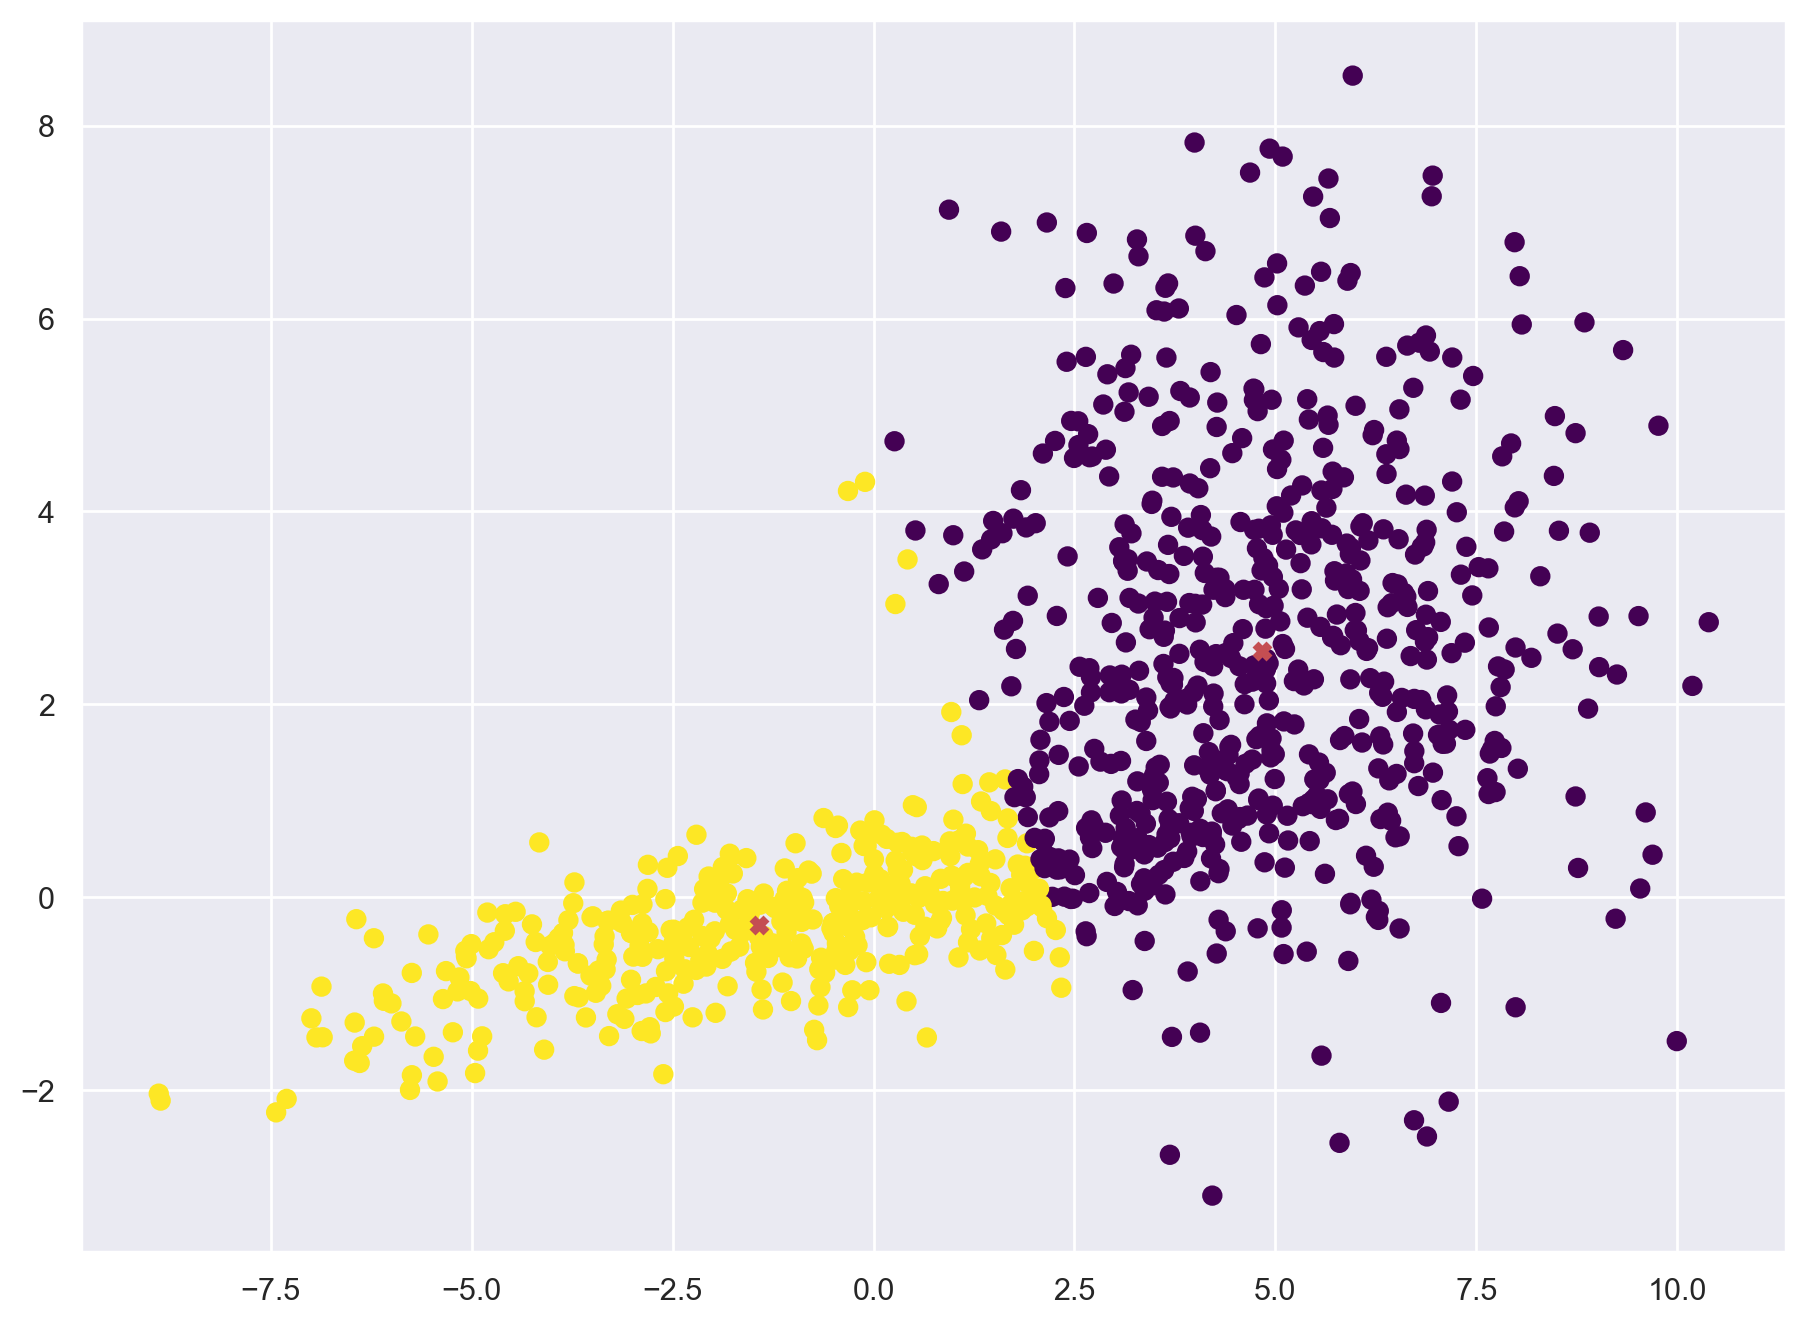

In [17]:
plt.plot(centr_all[0][:, 0], centr_all[0][:, 1], 'rX')
plt.scatter(X2[:, 0], X2[:, 1], c=labels_all[0], s=40, cmap='viridis')

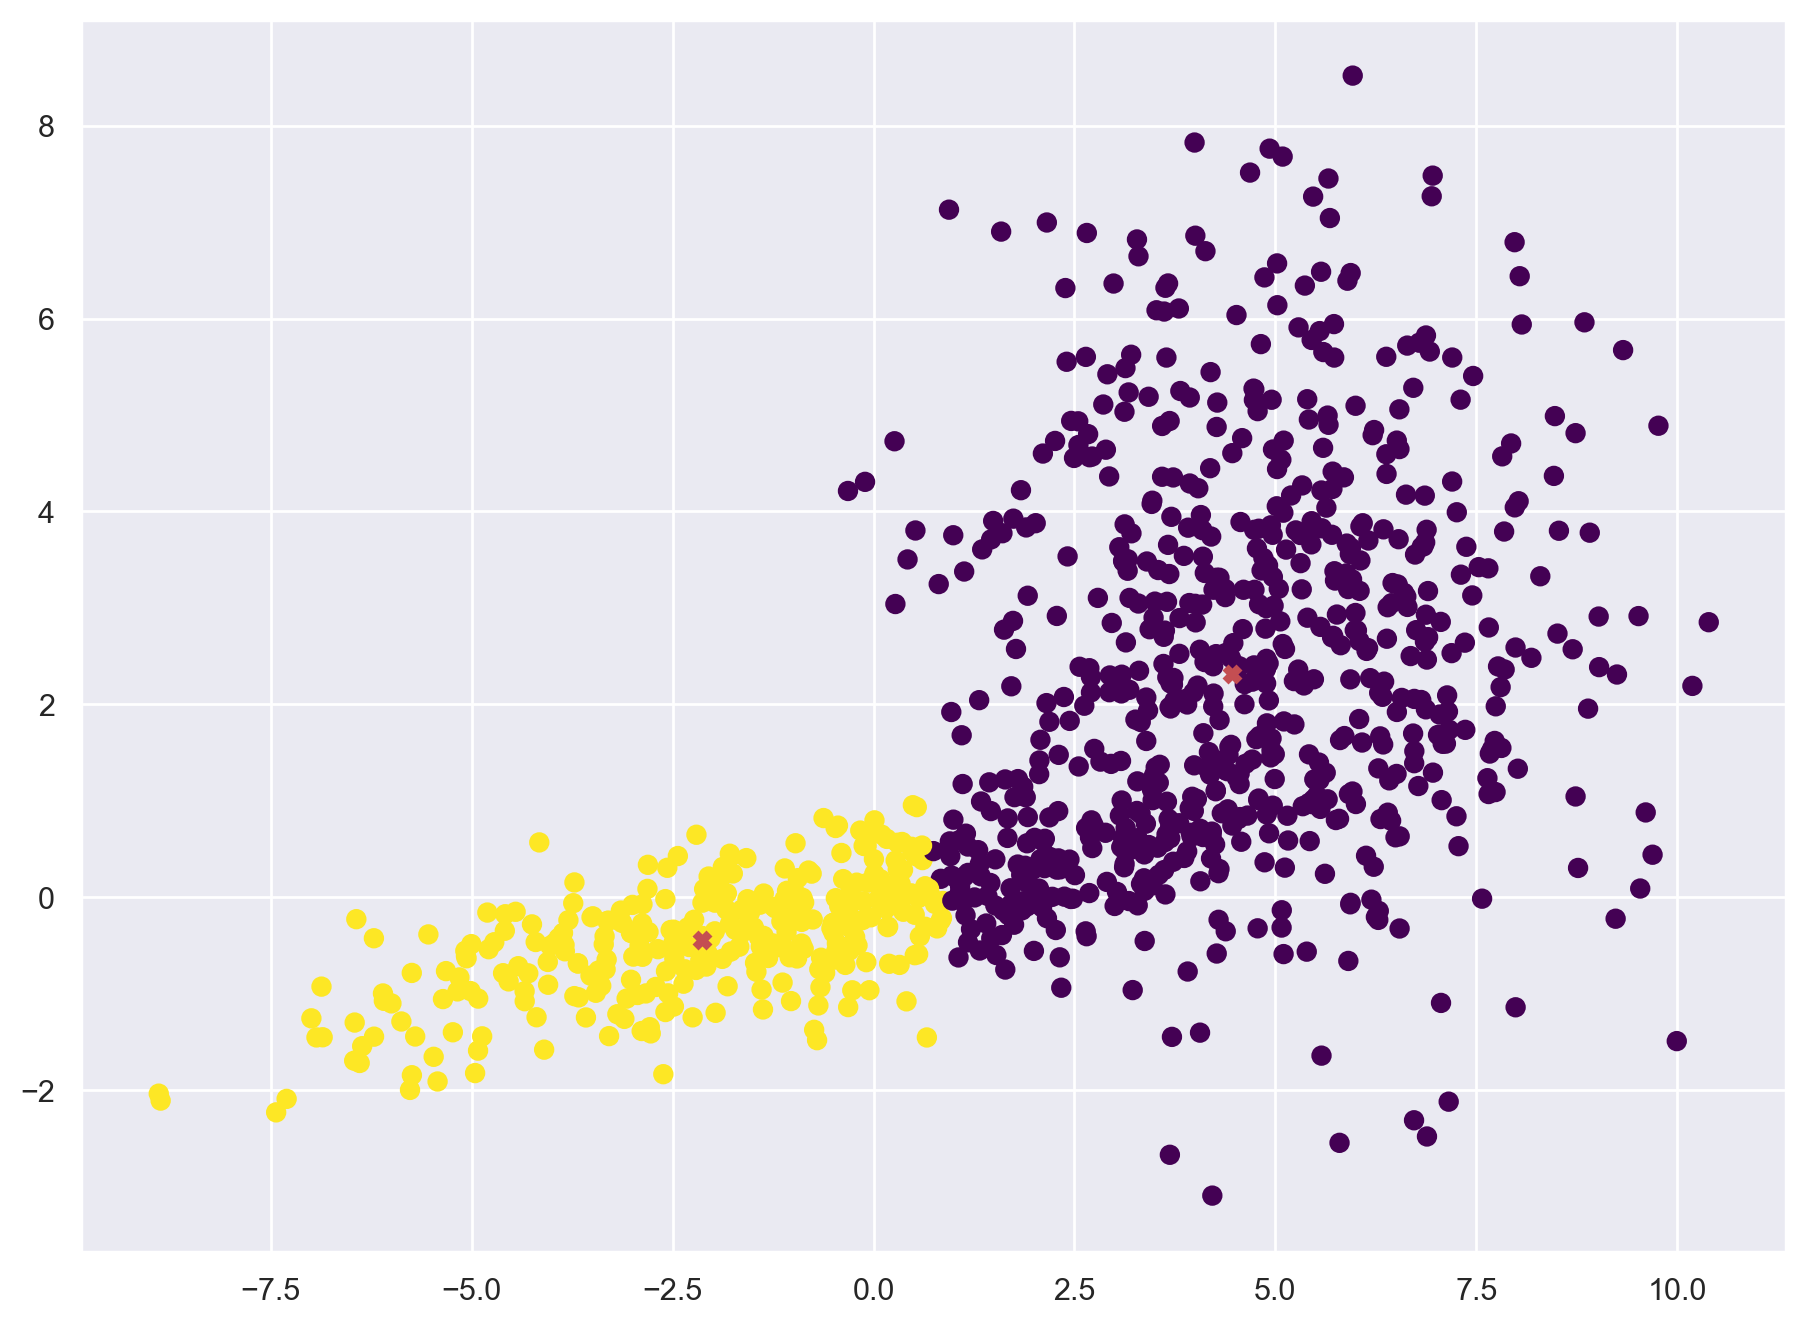

In [18]:
plt.plot(centr_all[1][:, 0], centr_all[1][:, 1], 'rX')
plt.scatter(X2[:, 0], X2[:, 1], c=labels_all[1], s=40, cmap='viridis')

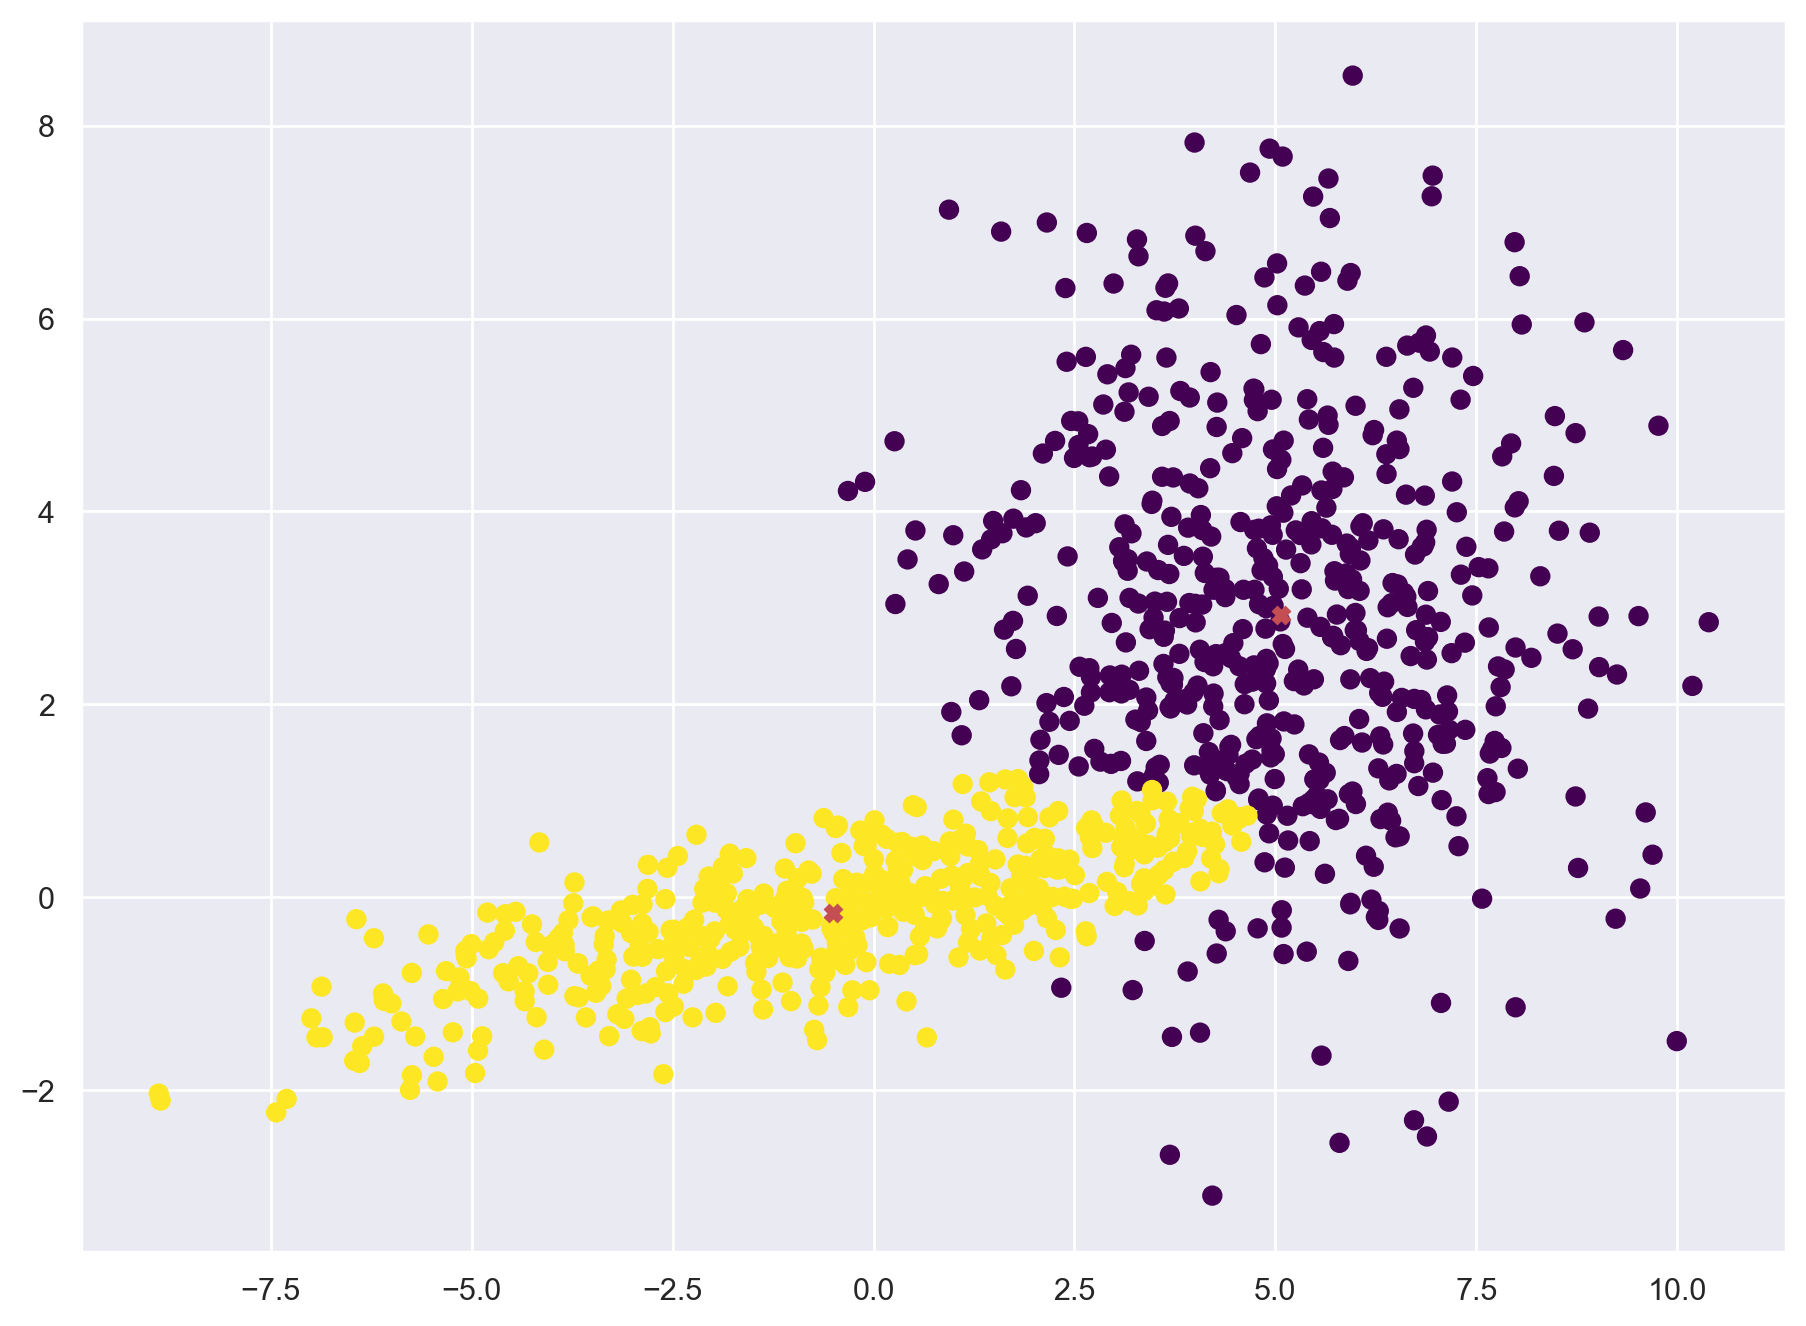

In [19]:
plt.plot(centr_all[2][:, 0], centr_all[2][:, 1], 'rX')
plt.scatter(X2[:, 0], X2[:, 1], c=labels_all[2], s=40, cmap='viridis')

## 2. K-means, GMM et clustering agglomératif pour le clustering : données réelles (MNIST)


Dans cette partie on va appliquer les méthodes de clustering étudiées sur les données intégré dans sklearn sur des chiffres manuscrits.

In this part we will apply the clustering methods studied on the data integrated in sklearn on handwritten figures.

In [20]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y_true = digits.data, digits.target

In [21]:
X.shape

(1797, 64)

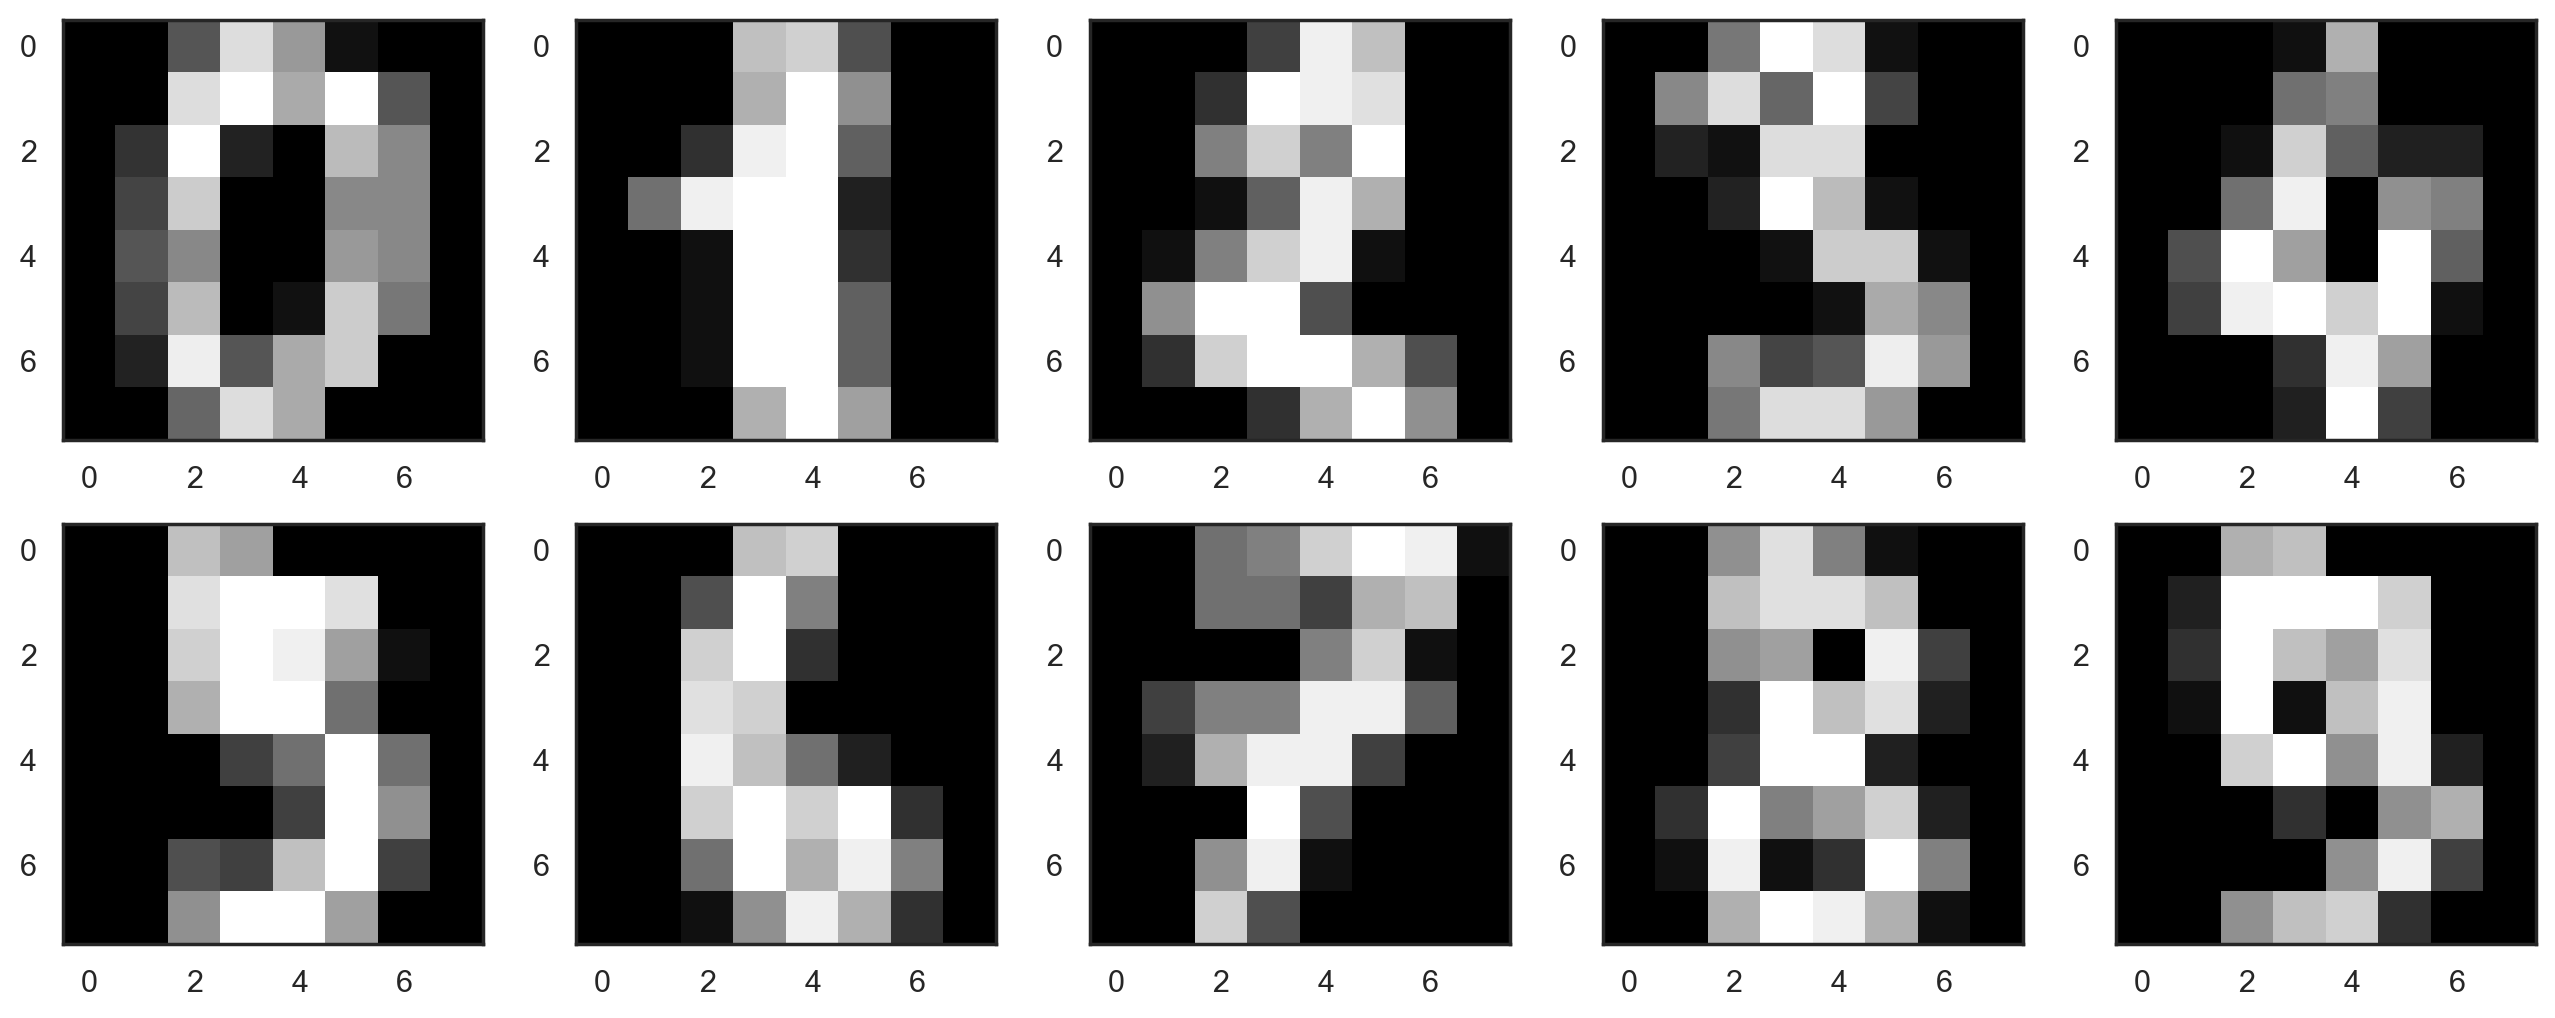

In [22]:
with sns.axes_style("white"):
  plt.figure(figsize=(16, 6))
  for i in range(10):
      plt.subplot(2, 5, i + 1)
      plt.imshow(X[i,:].reshape([8,8]), cmap='gray'); 

Projecting 64-dimensional data to 2D


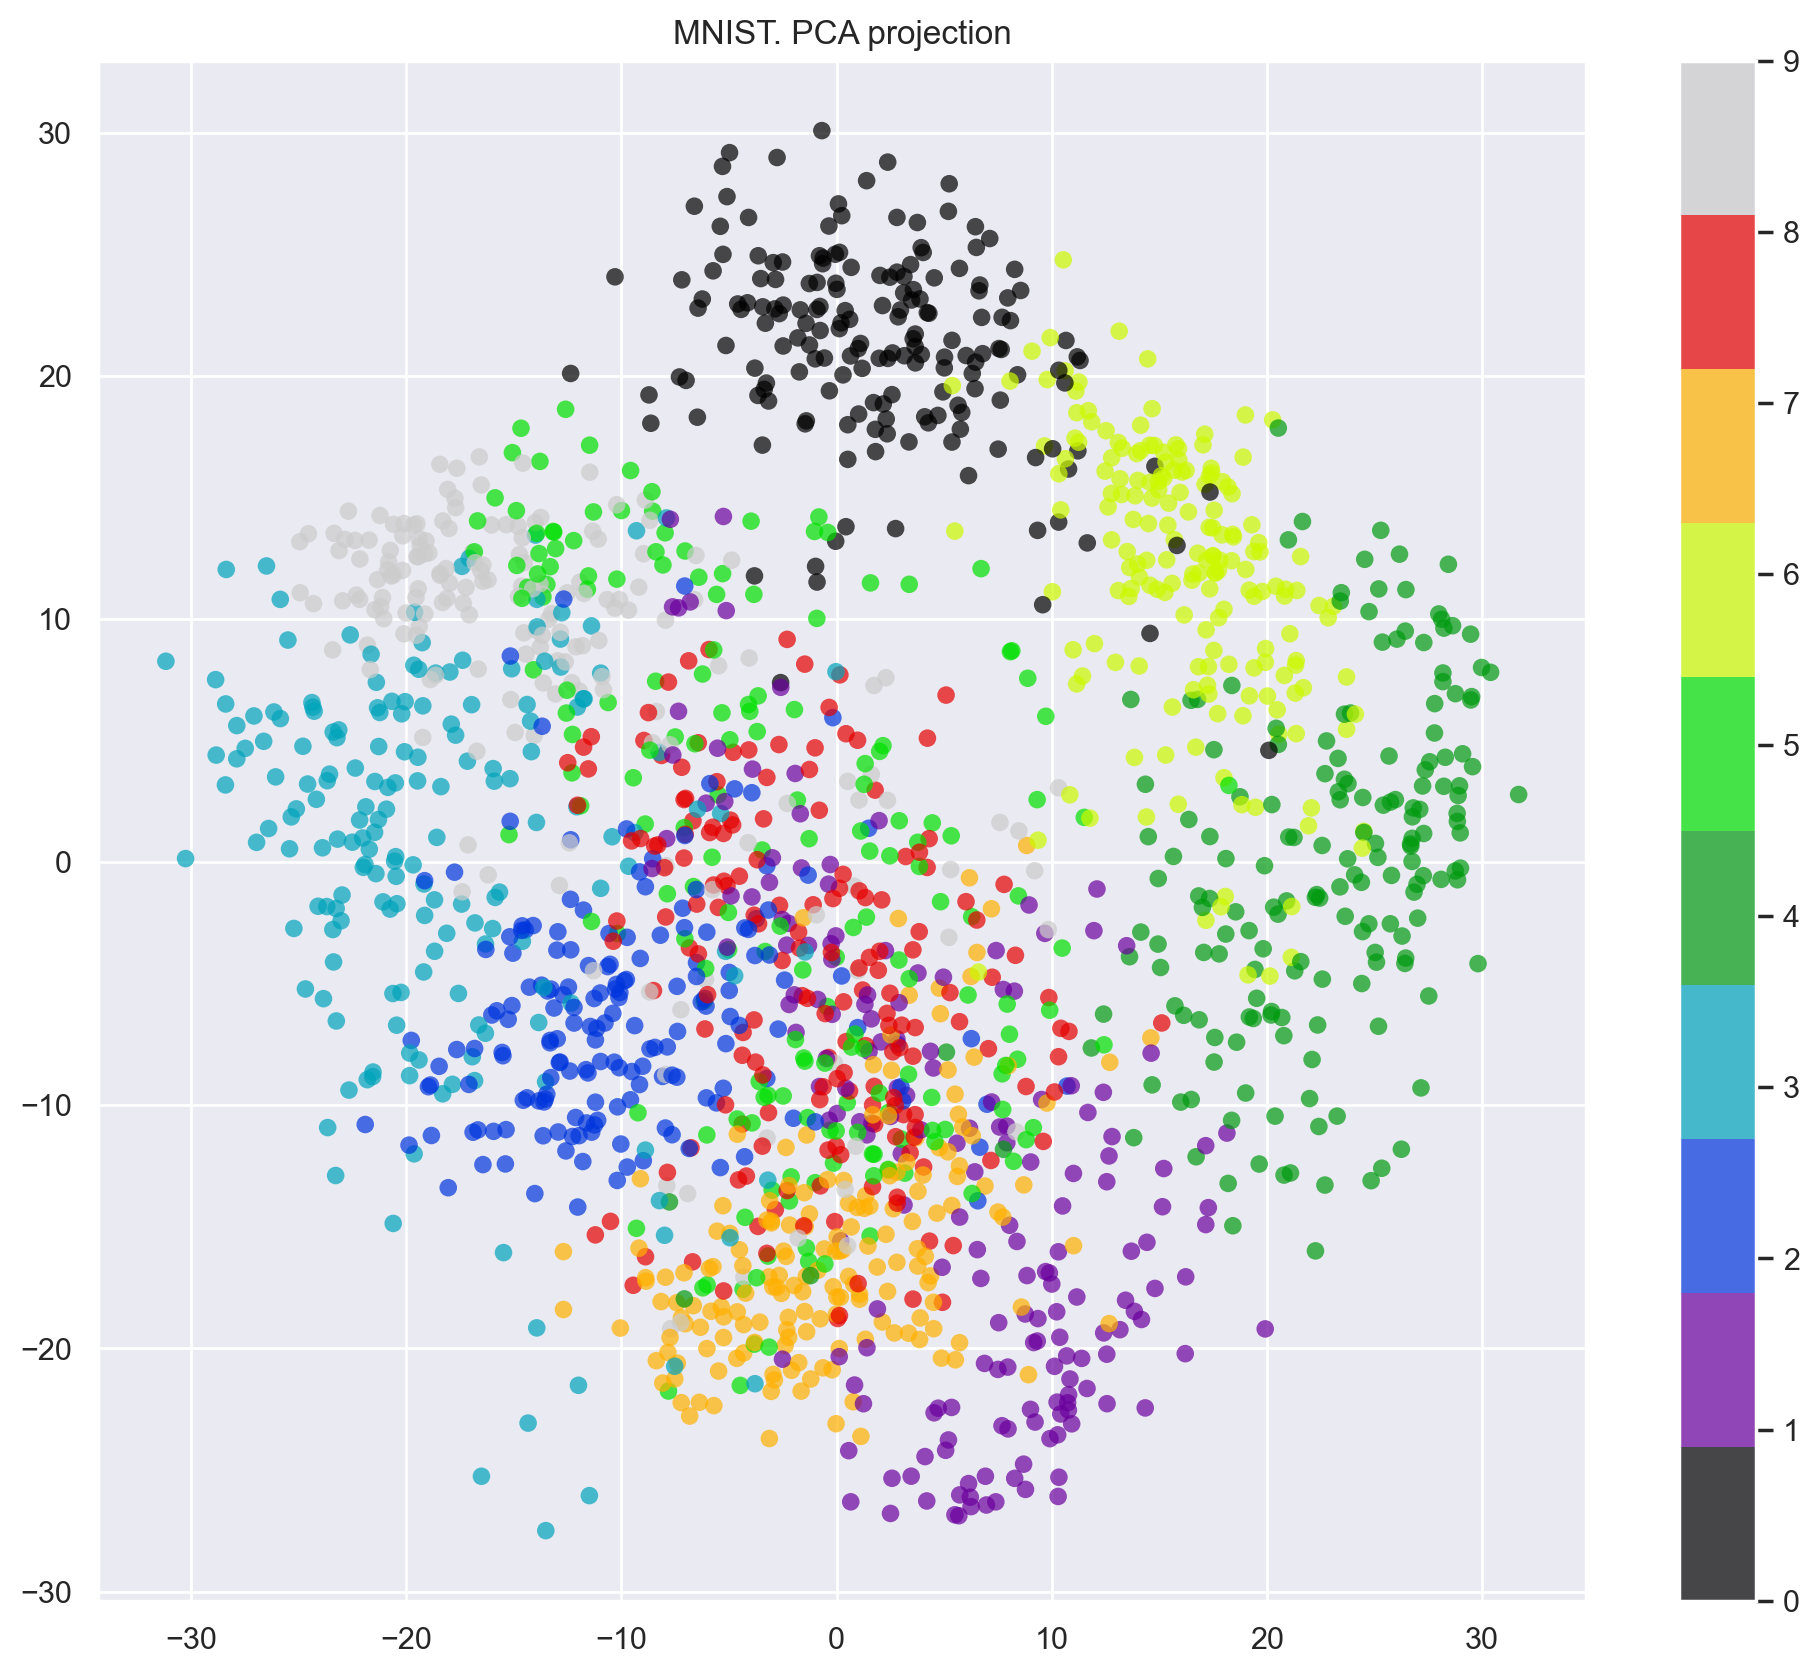

In [23]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_true, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

**Ex. 3** : Appliquez les méthodes [`K-means`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [`GMM`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) et [`clustering agglomératif`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) aux données de chiffres manuscrits. Visualisez les centres de cluster sous forme d'images (c'est-à-dire remodelez chacun en 8x8 et utilisez `plt.imshow`), les clusters semblent-ils être corrélés avec des chiffres particuliers?

**Ex. 3**: Apply the methods [`K-means`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [`GMM`](https:// scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) and [`Agglomerative clustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) to handwritten digit data. Visualize the cluster centers as images (i.e. reshape each to 8x8 and use `plt.imshow`), do the clusters appear to be correlated with particular numbers?

In [24]:
# You code here
algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AgglomerativeClustering(n_clusters=10))
algorithms.append(GaussianMixture(n_components=10))

In [25]:
data = []
labels_all = []
centr_all = []
for algo in algorithms:
    labels = algo.fit_predict(X)
    labels_all.append(labels)
    centr_all.append(
        np.stack((
          np.mean(X[labels == 0, :], axis=0),
          np.mean(X[labels == 1, :], axis=0),
          np.mean(X[labels == 2, :], axis=0),
          np.mean(X[labels == 3, :], axis=0),
          np.mean(X[labels == 4, :], axis=0),
          np.mean(X[labels == 5, :], axis=0),
          np.mean(X[labels == 6, :], axis=0),
          np.mean(X[labels == 7, :], axis=0),
          np.mean(X[labels == 8, :], axis=0),
          np.mean(X[labels == 9, :], axis=0)
      ))
    )
    data.append(({
        'ARI': metrics.adjusted_rand_score(y_true, labels),
        'AMI': metrics.adjusted_mutual_info_score(y_true, labels),
        'Homogenity': metrics.homogeneity_score(y_true, labels),
        'Completeness': metrics.completeness_score(y_true, labels),
        'V-measure': metrics.v_measure_score(y_true, labels),
        'Silhouette': metrics.silhouette_score(X, labels)}))

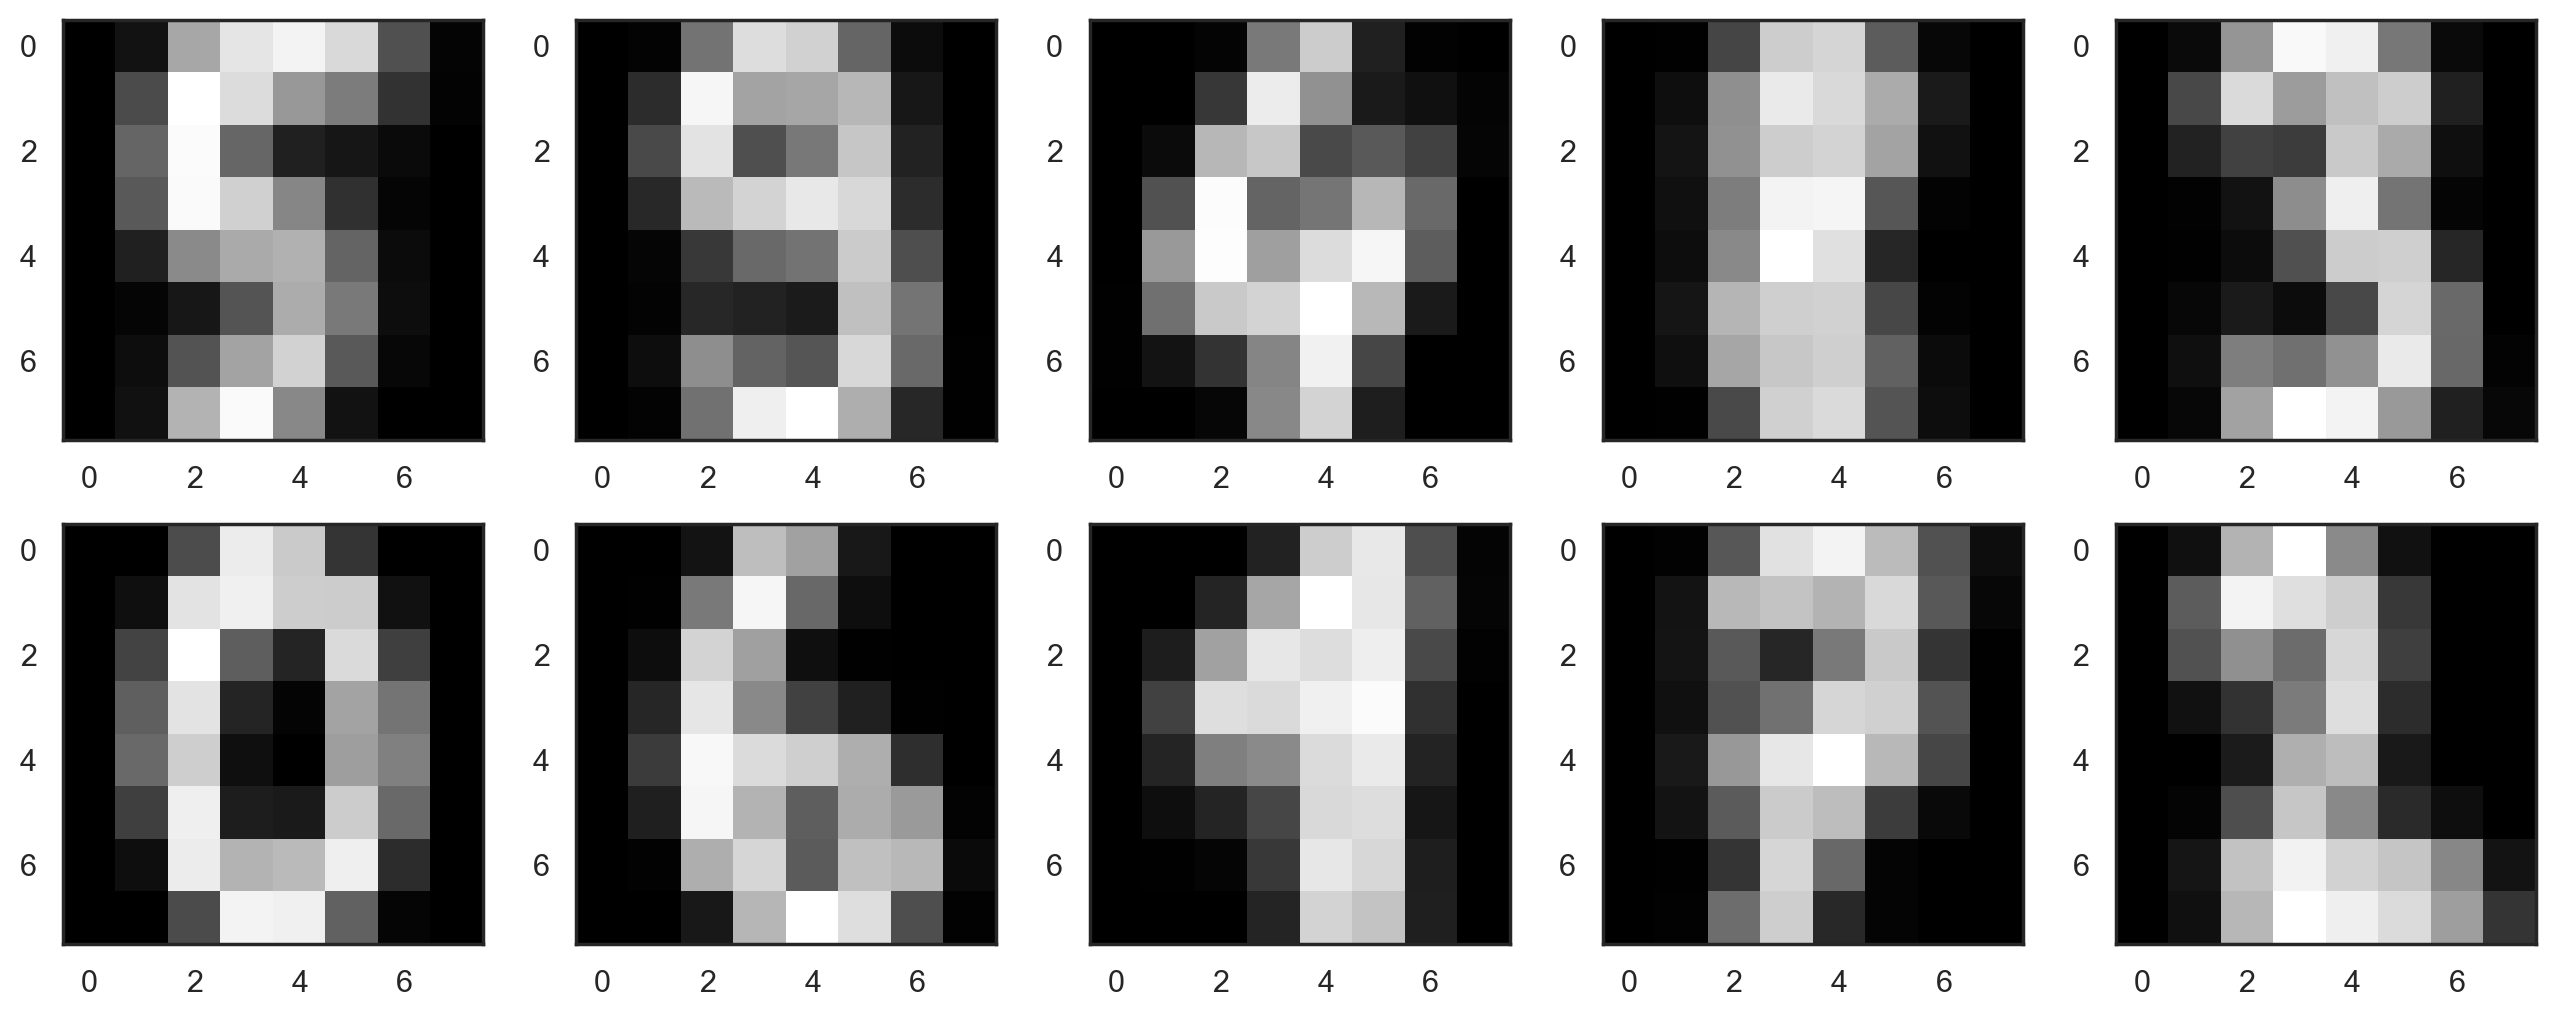

In [26]:
with sns.axes_style("white"):
  plt.figure(figsize=(16, 6))
  for i in range(10):
      plt.subplot(2, 5, i + 1)
      plt.imshow(centr_all[0][i,:].reshape([8,8]), cmap='gray'); 

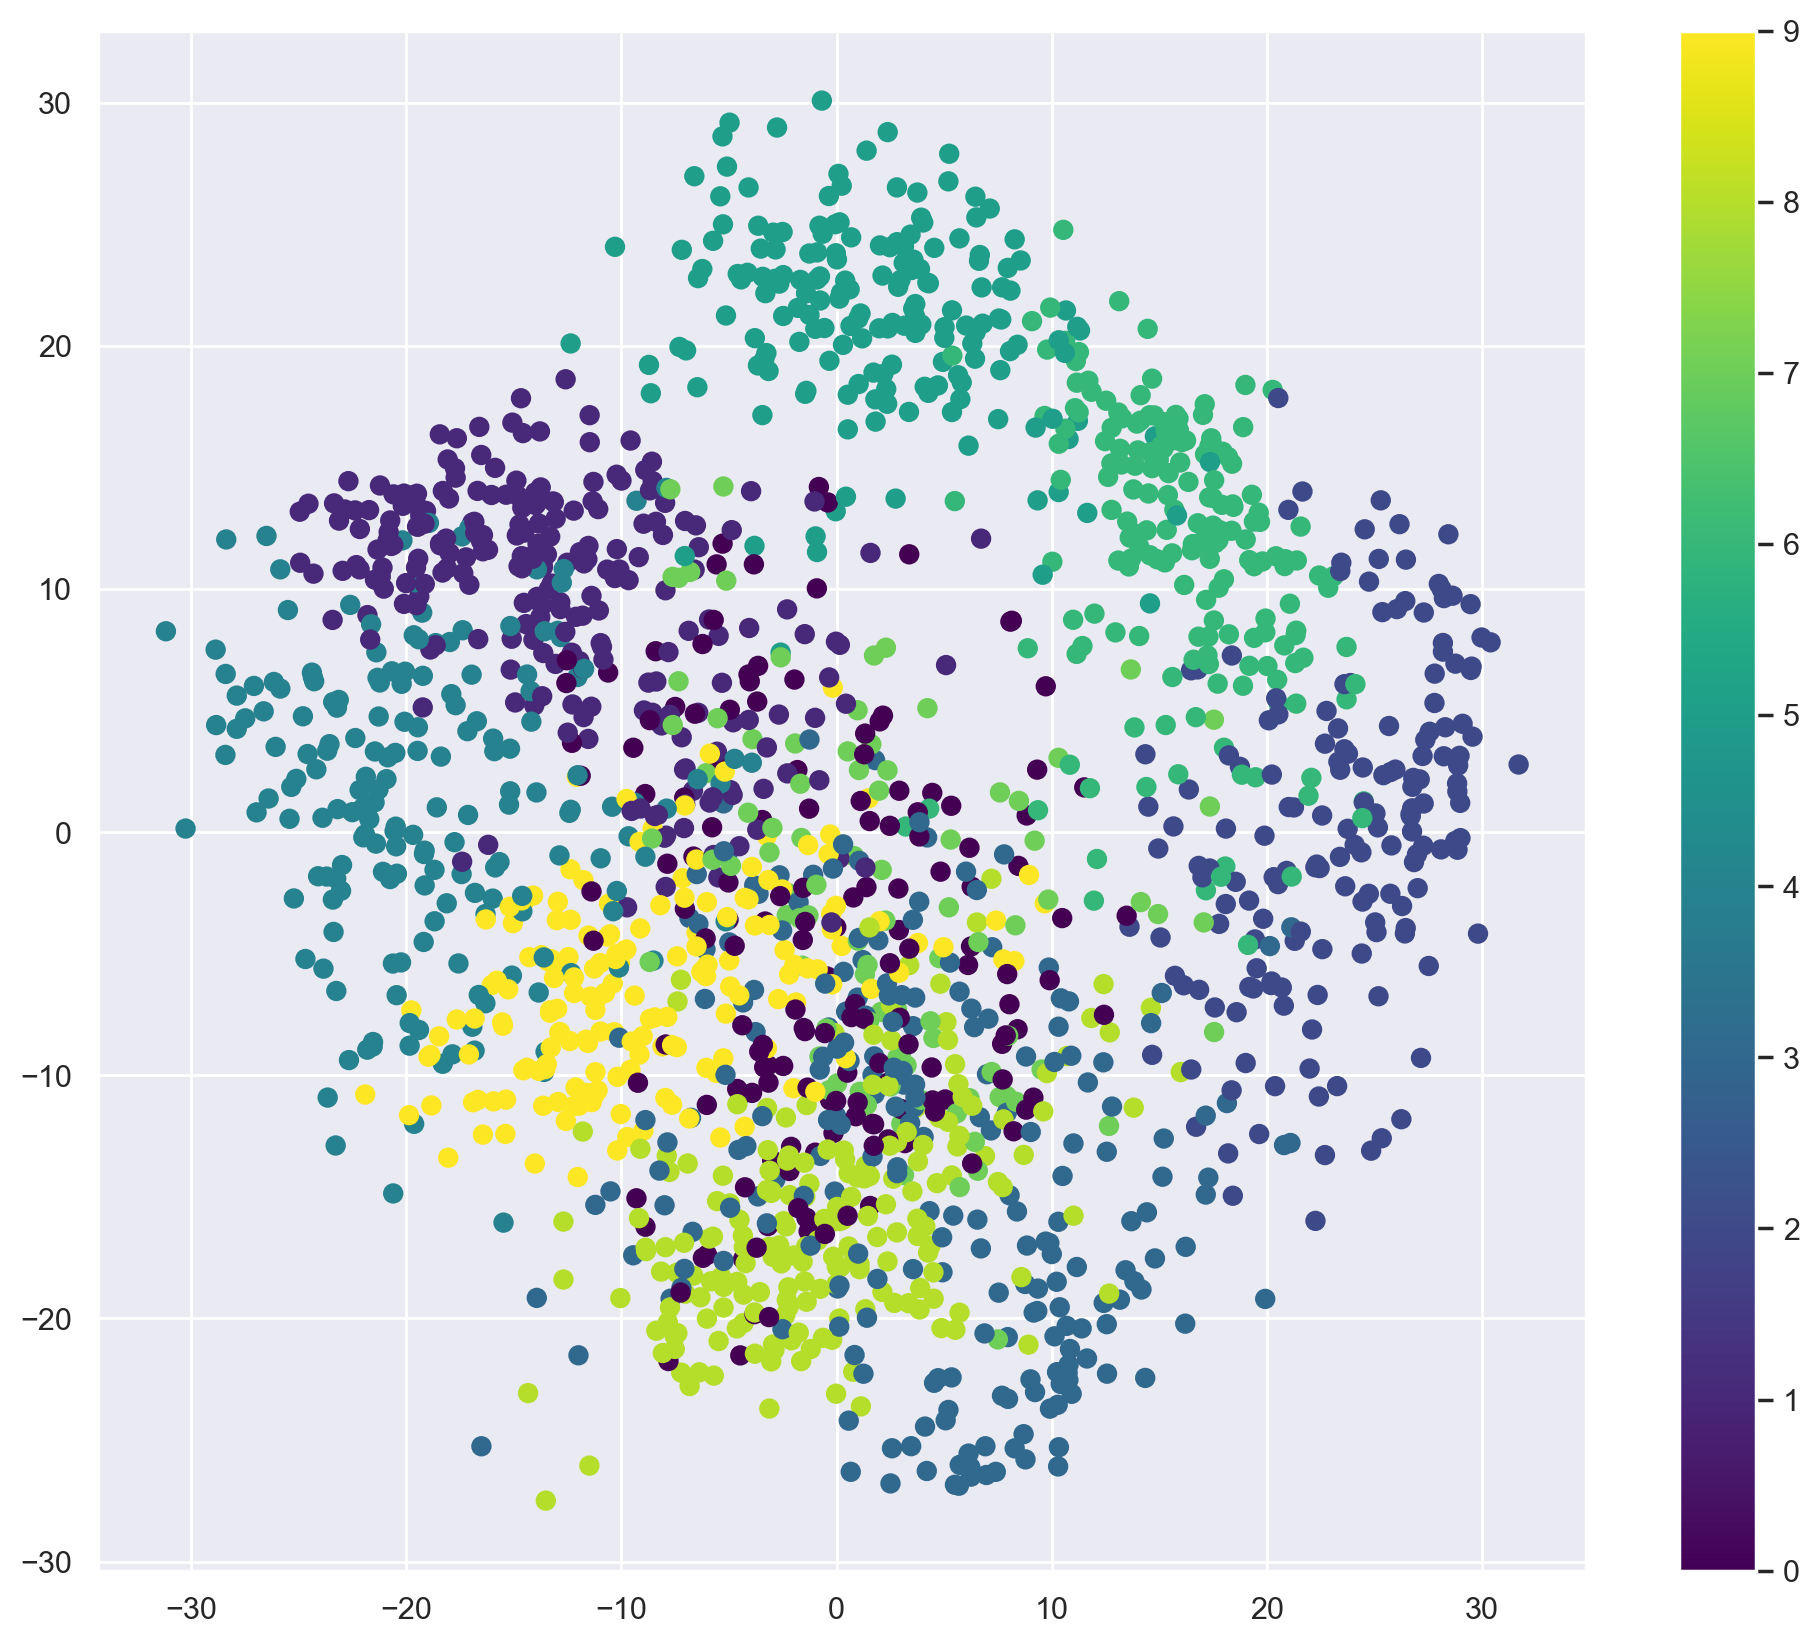

In [27]:
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_all[0], s=40, cmap='viridis')
plt.colorbar()

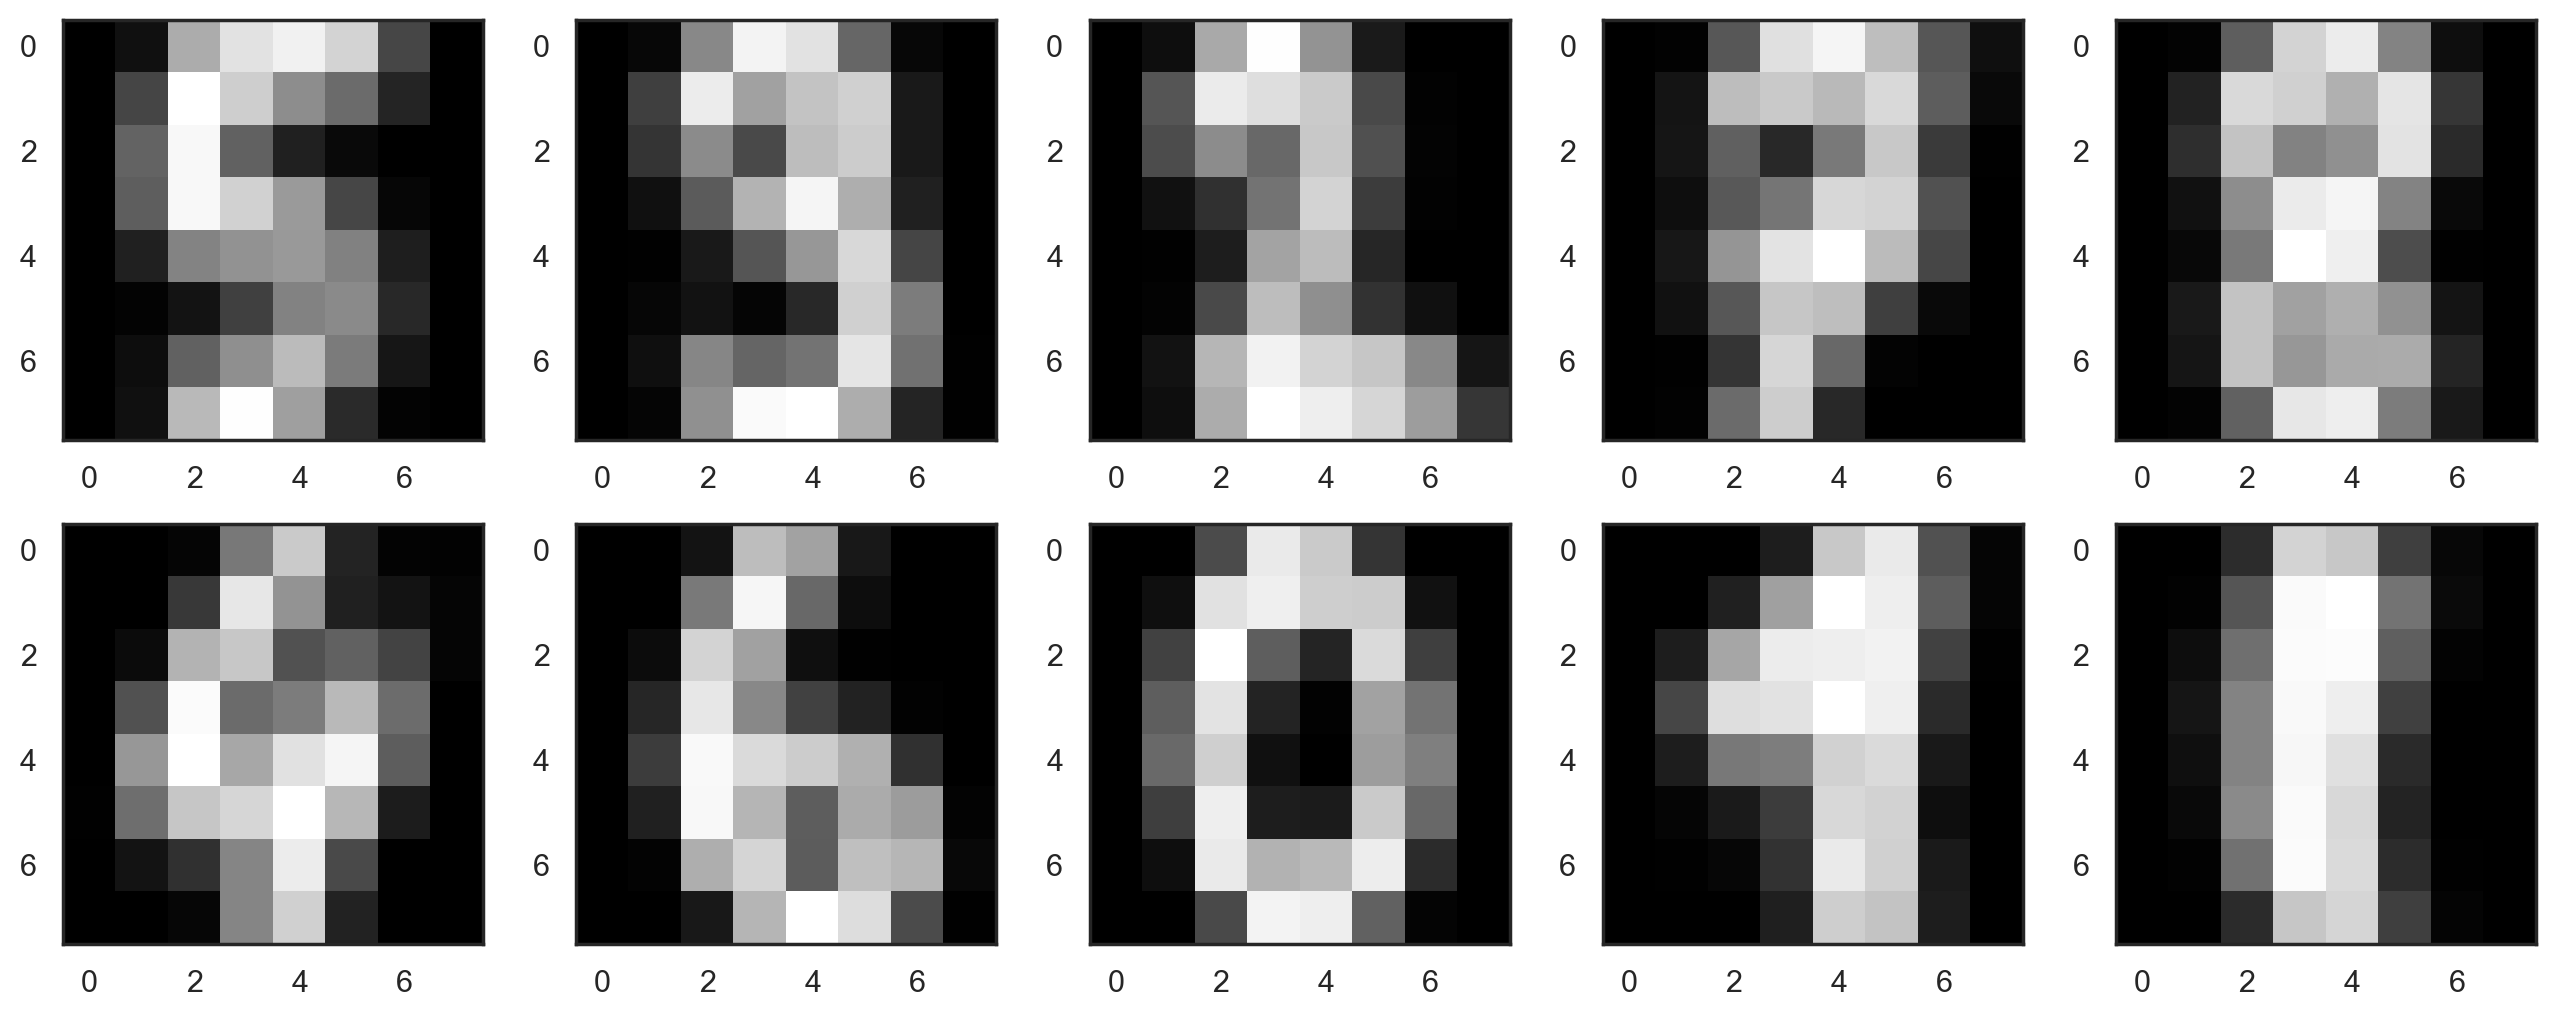

In [28]:
with sns.axes_style("white"):
  plt.figure(figsize=(16, 6))
  for i in range(10):
      plt.subplot(2, 5, i + 1)
      plt.imshow(centr_all[1][i,:].reshape([8,8]), cmap='gray'); 

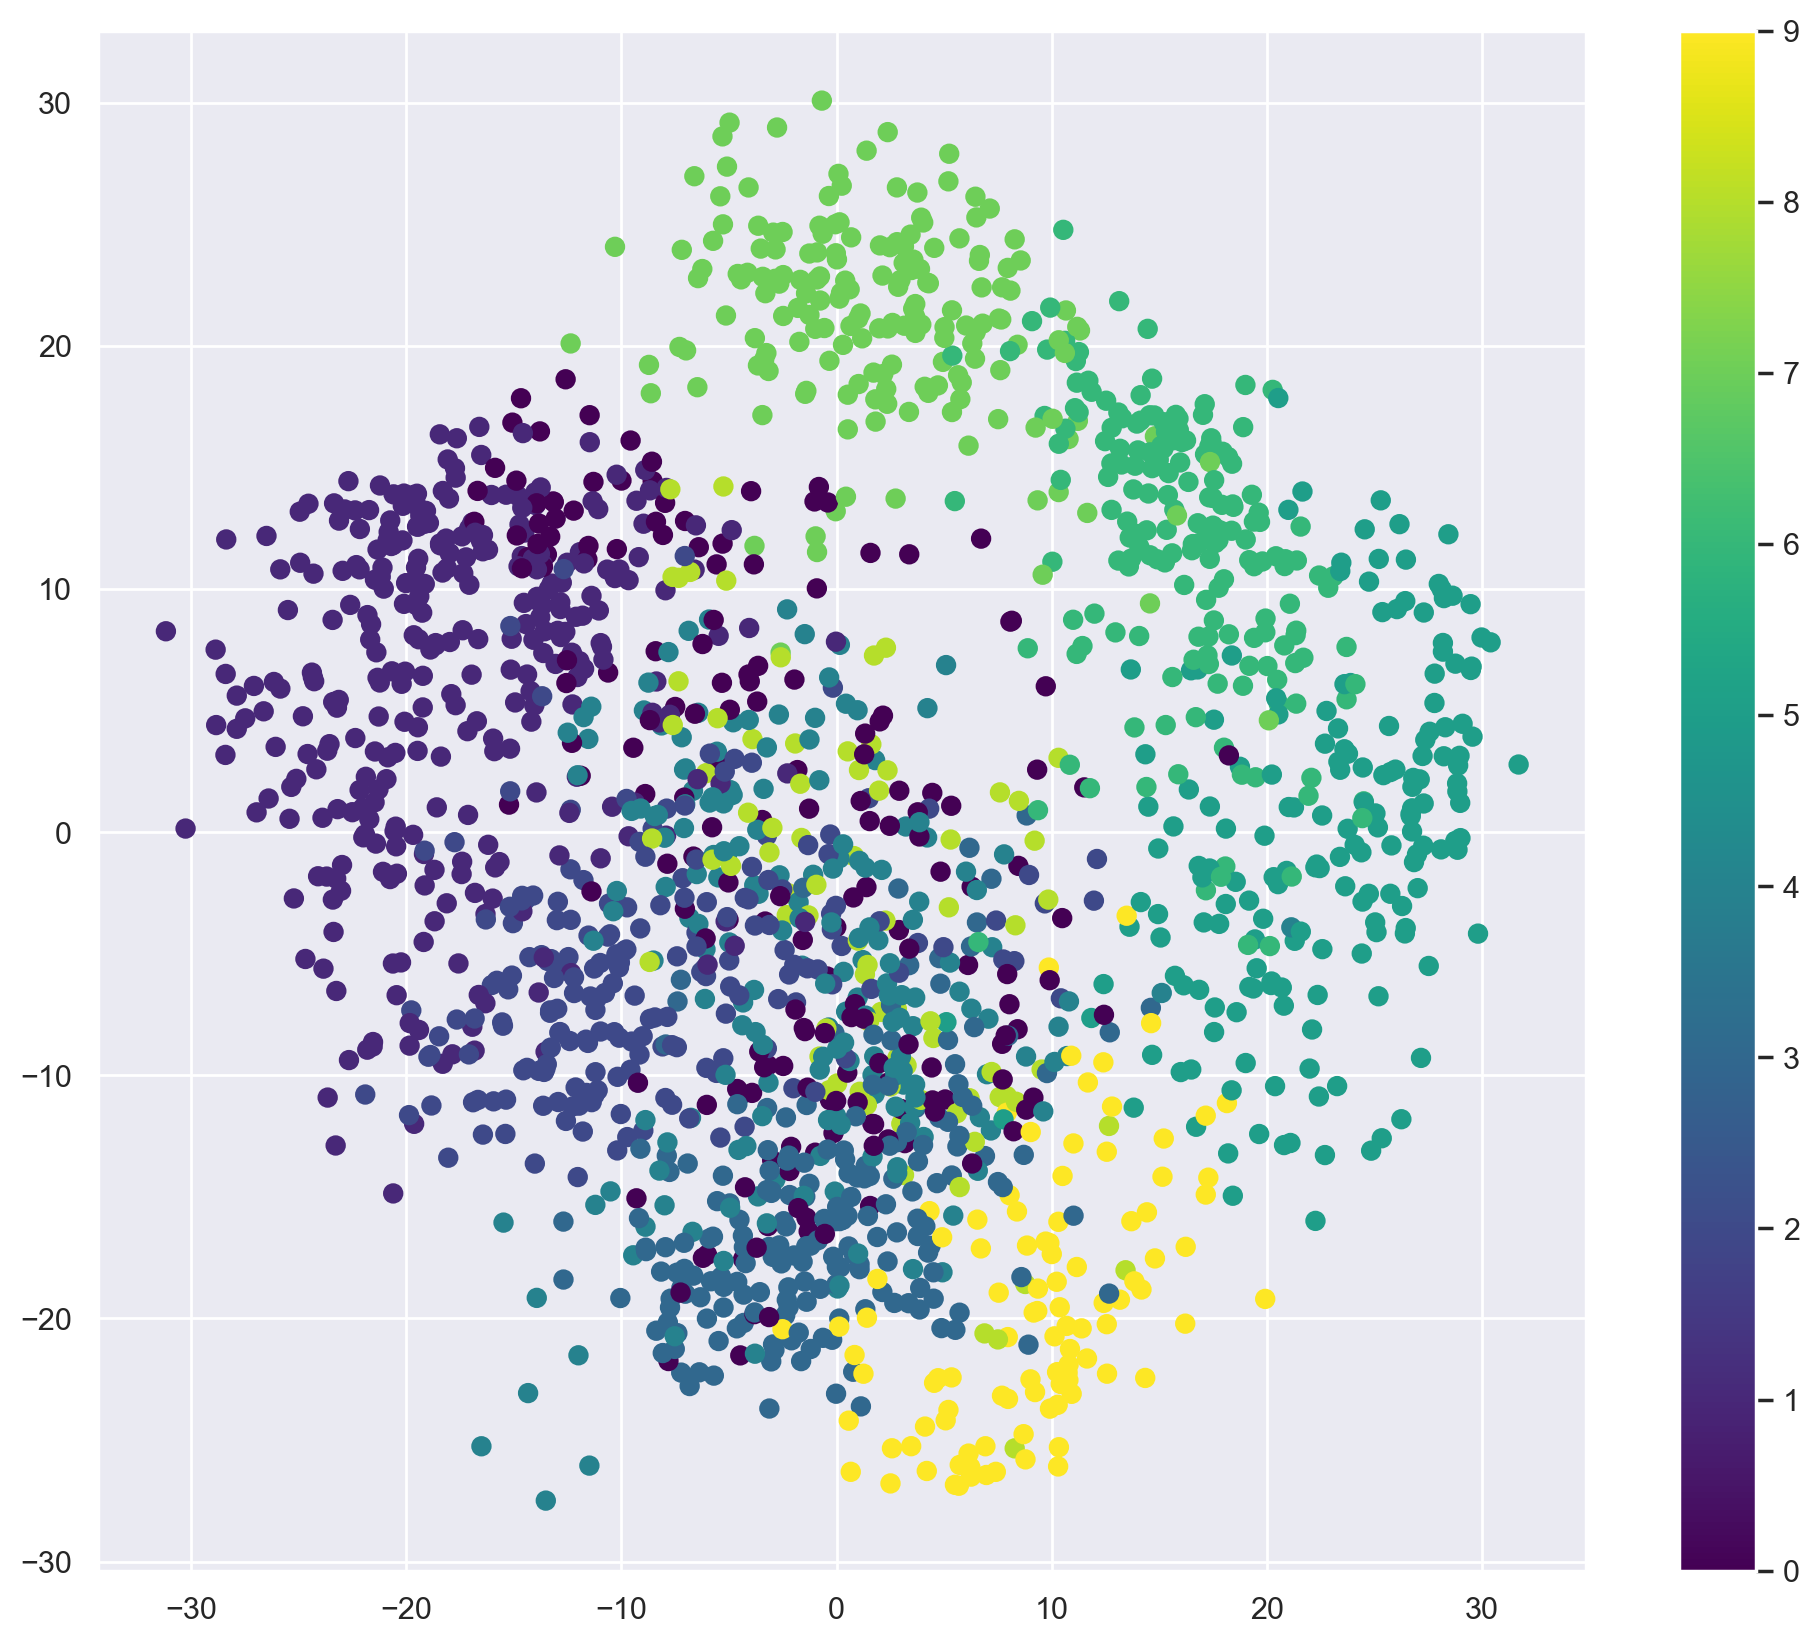

In [29]:
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_all[1], s=40, cmap='viridis')
plt.colorbar()

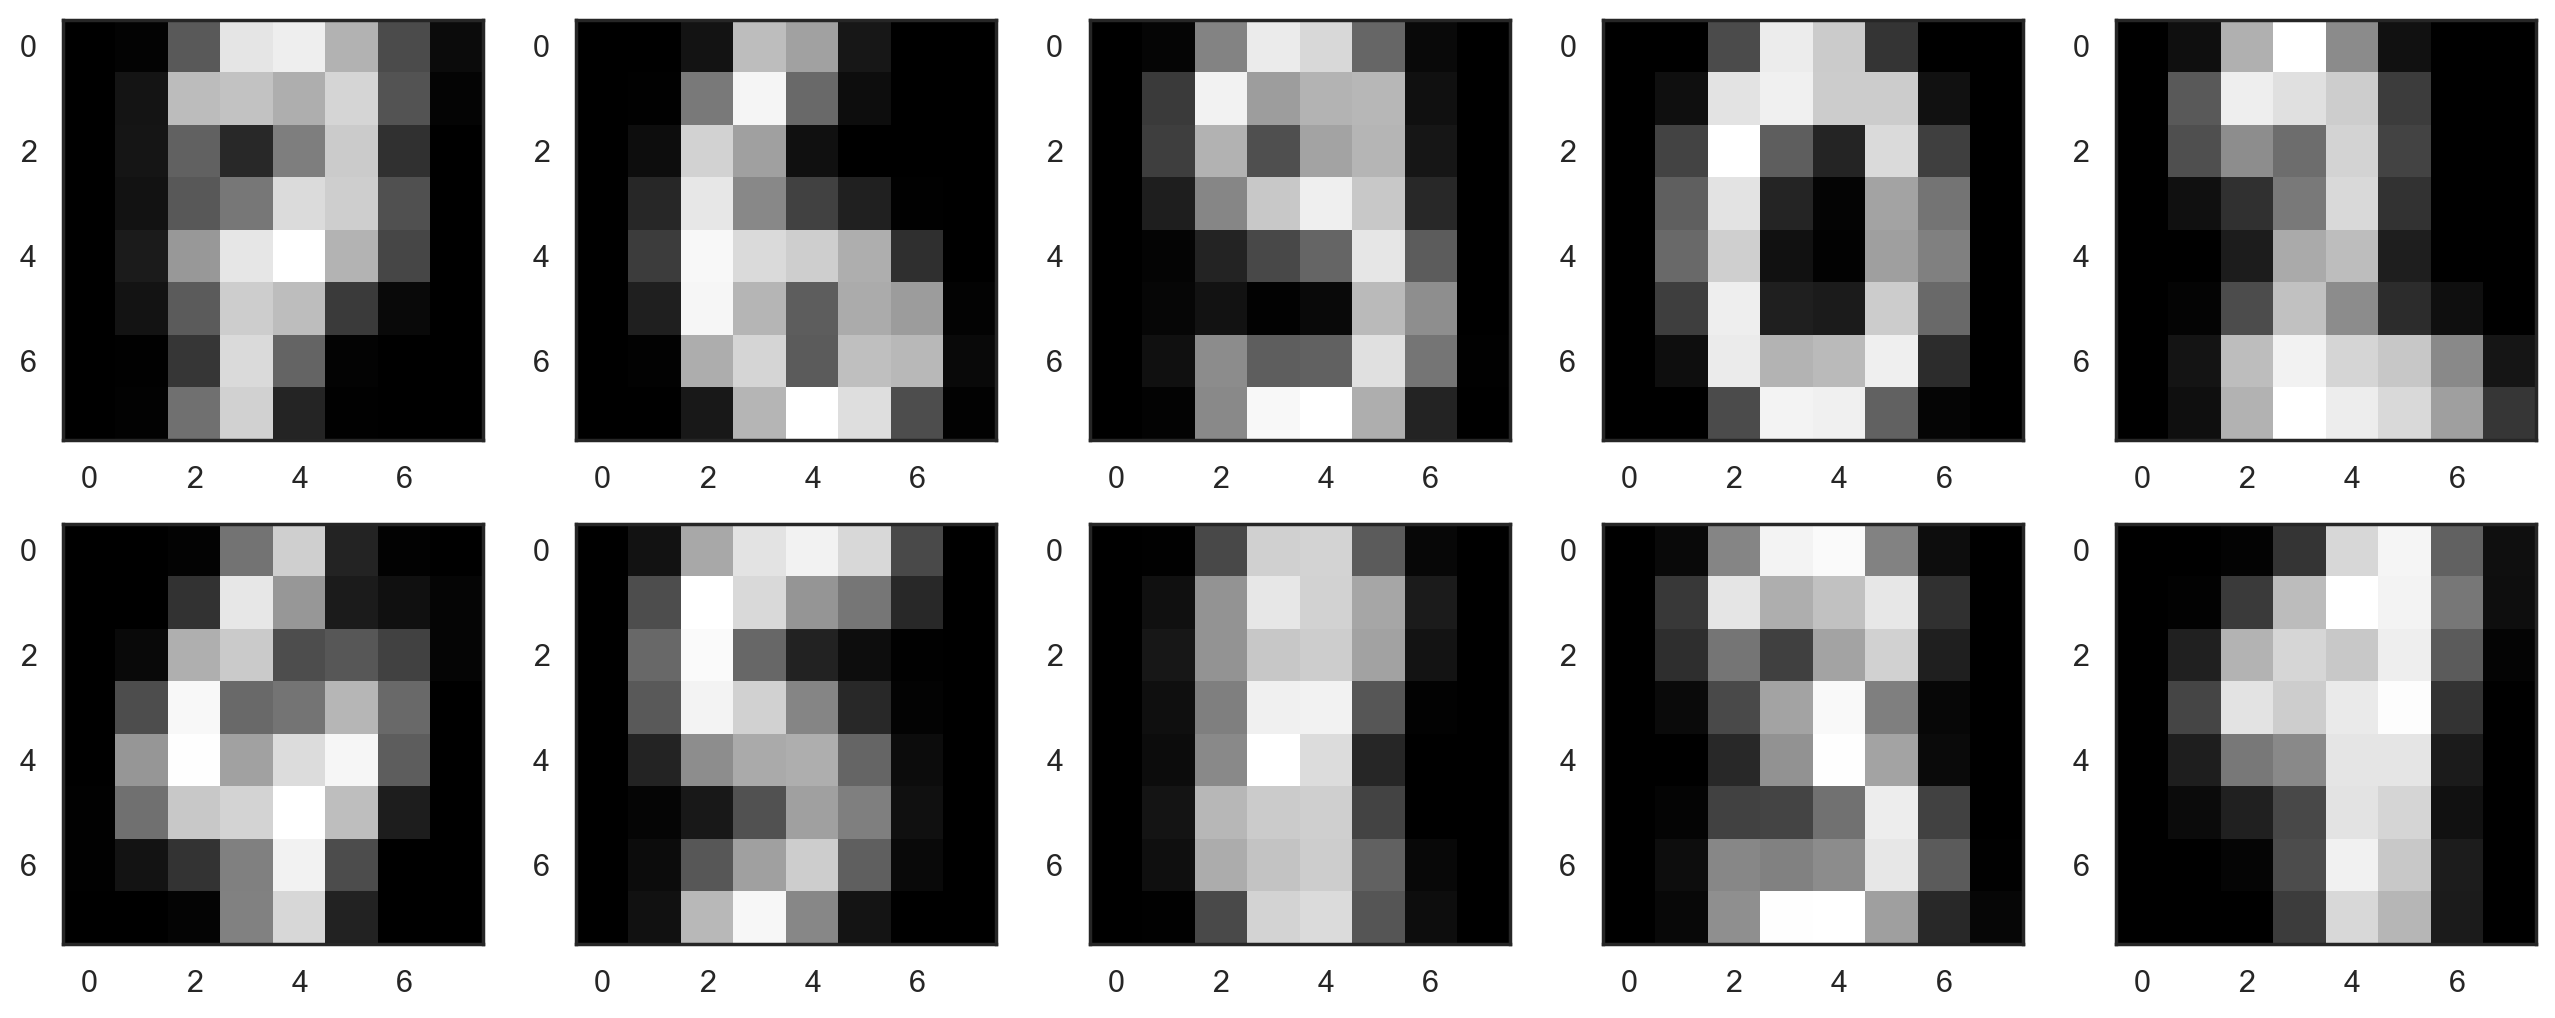

In [30]:
with sns.axes_style("white"):
  plt.figure(figsize=(16, 6))
  for i in range(10):
      plt.subplot(2, 5, i + 1)
      plt.imshow(centr_all[2][i,:].reshape([8,8]), cmap='gray'); 

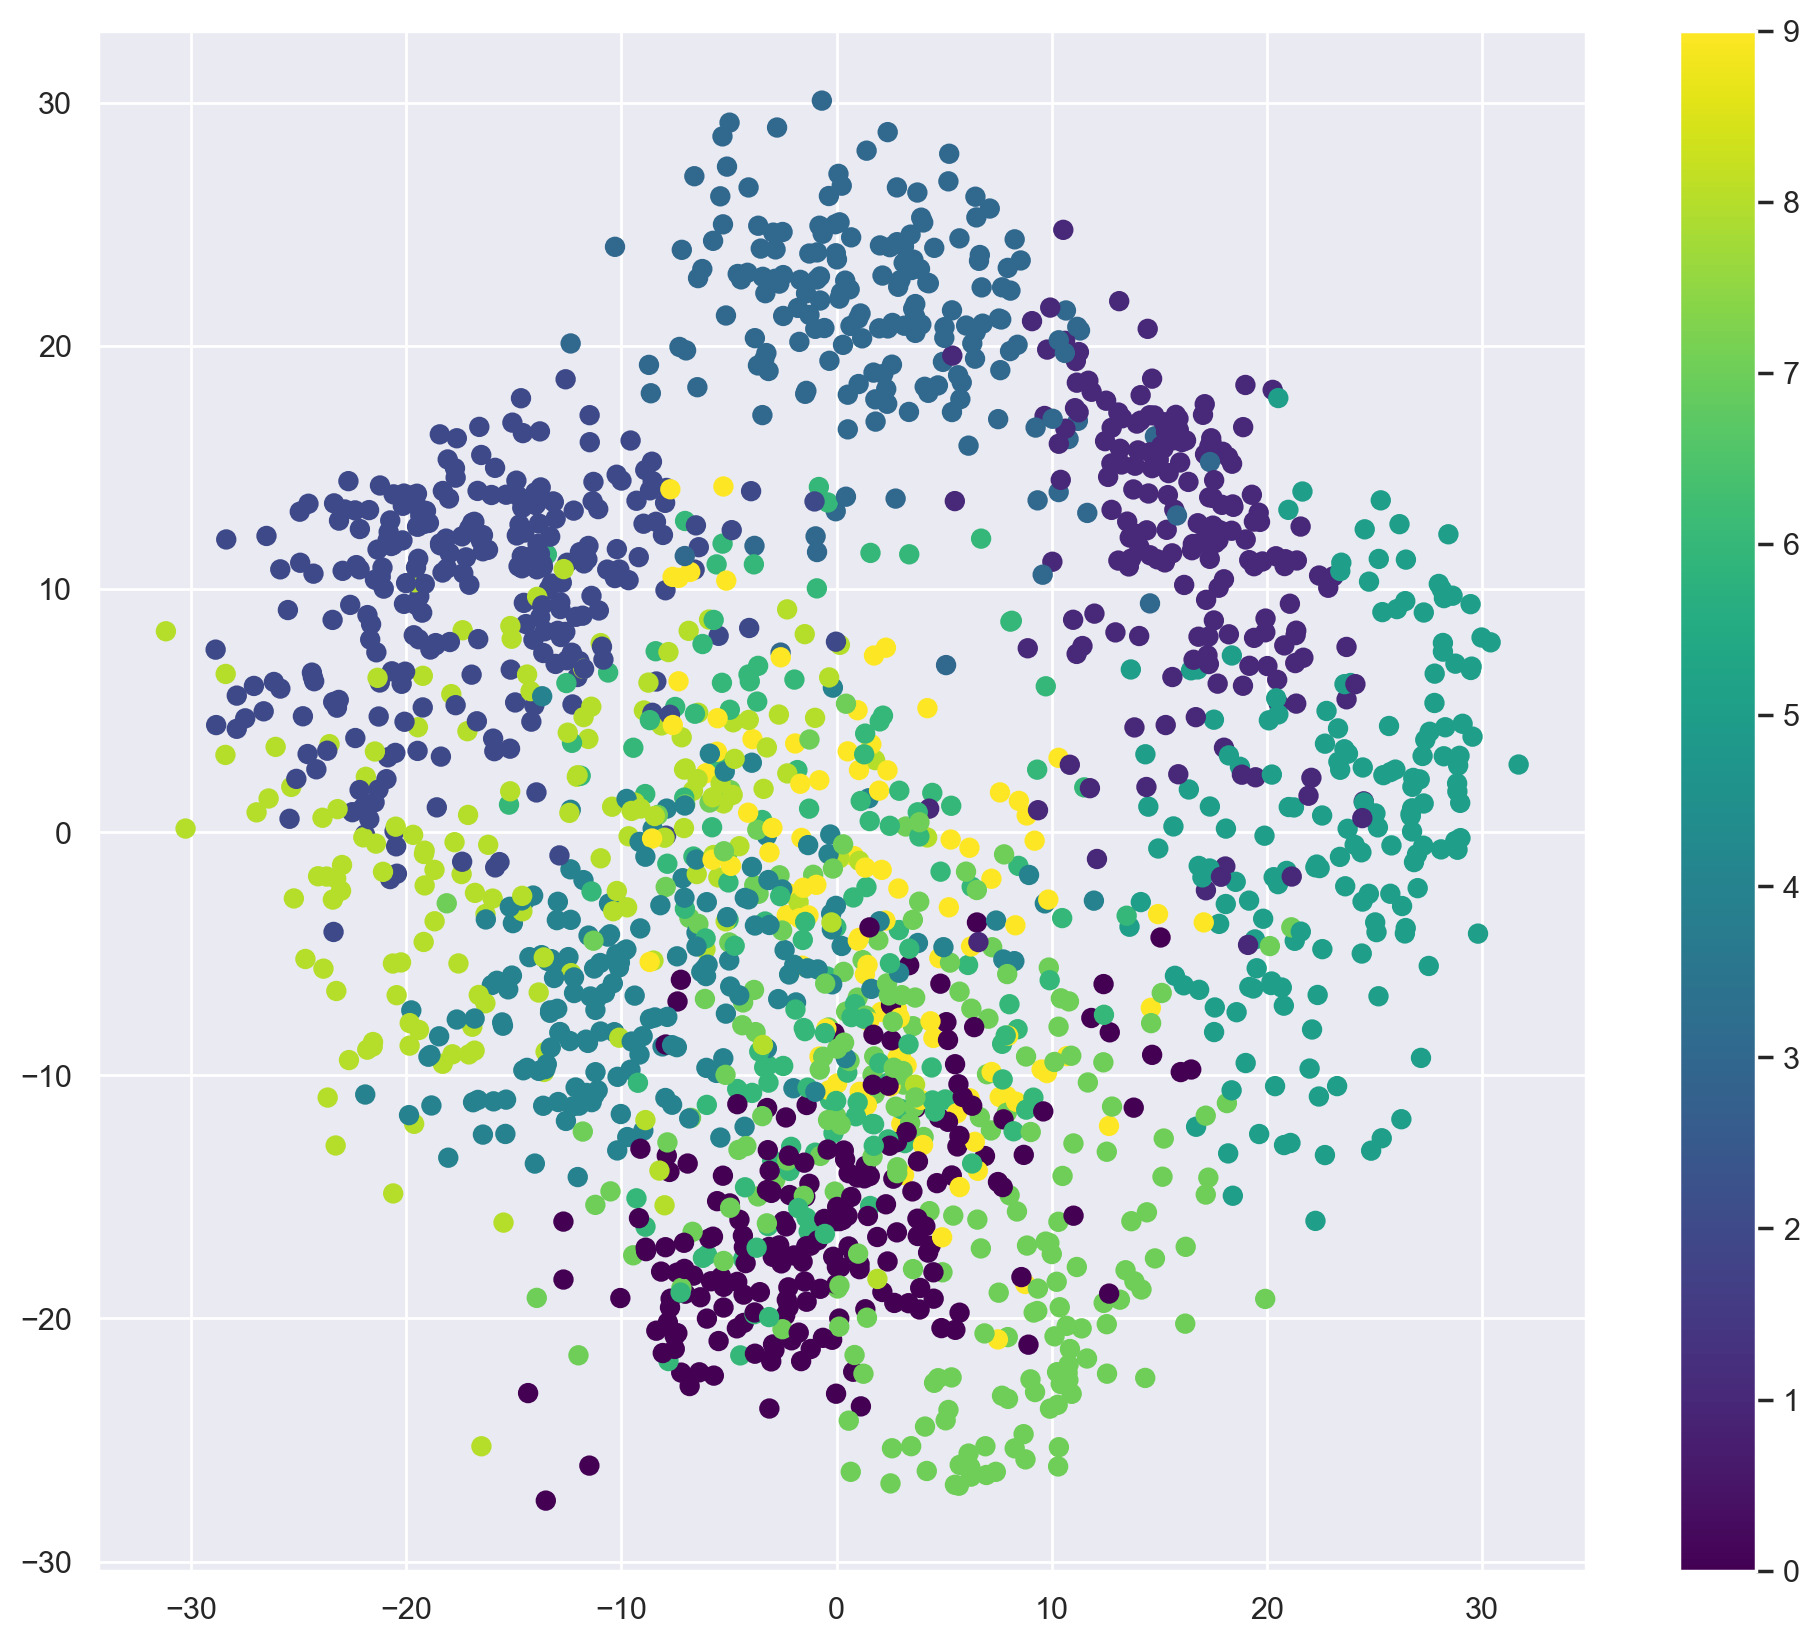

In [31]:
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_all[2], s=40, cmap='viridis')
plt.colorbar()

**Ex. 4** : Comparez les algorithmes d'Ex.3 à l'aide de métriques de qualité du clustering : [`ARI`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html),	[`AMI`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html),	[`Homogenity`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html),	[`Completeness`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html),	[`V-measure`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html) et	[`Silhouette`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). 

**Ex. 4**: Compare the algorithms of Ex.3 using clustering quality metrics:

In [32]:
# You code here
results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means','Agglomerative', 'GaussianMixture'])

print(results)

                      ARI       AMI  Homogenity  Completeness  V-measure  \
K-means          0.667179  0.736804    0.735623      0.743268   0.739426   
Agglomerative    0.794003  0.866832    0.857513      0.879096   0.868170   
GaussianMixture  0.644371  0.739936    0.738625      0.746471   0.742527   

                 Silhouette  
K-means            0.182247  
Agglomerative      0.178497  
GaussianMixture    0.174280  


# Mémo sur les mesures de précision

Contrairement à la classification, il est difficile d'évaluer la qualité des résultats du clustering. Ici, une métrique ne peut pas dépendre des étiquettes mais uniquement de la qualité de la division. Deuxièmement, nous n'avons généralement pas de véritables étiquettes des observations lorsque nous utilisons le clustering.

Il existe des mesures de qualité *internes* et *externes*. Les métriques externes utilisent les informations sur la véritable séparation connue tandis que les métriques internes n'utilisent aucune information externe et évaluent la qualité des clusters en se basant uniquement sur les données initiales. Le nombre optimal de clusters est généralement défini par rapport à certaines métriques internes.

Toutes les métriques décrites ci-dessous sont implémentées dans `sklearn.metrics`.

# Memo on precision measurements

Unlike classification, it is difficult to assess the quality of clustering results. Here, a metric cannot depend on the labels but only on the quality of the division. Second, we usually don't have true case labels when we use clustering.

There are *internal* and *external* quality measures. External metrics use information about the known true separation while internal metrics use no external information and assess cluster quality based only on initial data. The optimal number of clusters is usually defined with respect to some internal metrics.

All the metrics described below are implemented in `sklearn.metrics`.

**Adjusted Rand Index (ARI)**

Ici, nous supposons que les véritables étiquettes des objets sont connues. Cette métrique ne dépend pas des valeurs des étiquettes mais de la division du cluster de données. Soit $N$ le nombre d'observations dans un échantillon. Soit $a$ le nombre de paires d'observation avec les mêmes étiquettes et situées dans le même cluster, et que $b$ soit le nombre de paires d'observation avec des étiquettes différentes et situées dans différents clusters. L'indice Rand peut être calculé à l'aide de la formule suivante: $$\text{RI} = \frac{2(a + b)}{n(n-1)}.$$
En d'autres termes, il évalue une part de paires d'observation pour lesquelles ces divisions (résultat initial et clustering) sont cohérentes. L'indice Rand (RI) évalue la similitude des deux divisions du même échantillon. Pour que cet indice soit proche de zéro pour tout résultat de clustering avec n'importe quel $n$ et nombre de clusters, il est essentiel de le mettre à l'échelle, d'où l'indice Adjusted Rand Index: $$\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}.$$

Cette métrique est symétrique et ne dépend pas de la permutation d'étiquette. Par conséquent, cet indice est une mesure des distances entre différentes divisions d'échantillon. $\text{ARI}$ prend des valeurs dans la plage $[-1, 1]$. Les valeurs négatives indiquent l'indépendance des divisions et les valeurs positives indiquent que ces divisions sont cohérentes (elles correspondent à $\text{ARI} = 1$).

**Adjusted Rand Index (ARI)**

Here we assume that the true labels of the objects are known. This metric does not depend on the values of the labels but on the division of the data cluster. Let $N$ be the number of observations in a sample. Let $a$ be the number of observation pairs with the same labels and located in the same cluster, and let $b$ be the number of observation pairs with different labels and located in different clusters. The Rand Index can be calculated using the following formula: $$\text{RI} = \frac{2(a + b)}{n(n-1)}.$$
In other words, it evaluates a share of observation pairs for which these divisions (initial result and clustering) are consistent. The Rand Index (RI) evaluates the similarity of two divisions of the same sample. For this index to be close to zero for any clustering result with any $n$ and number of clusters, it is essential to scale it, hence the Adjusted Rand Index: $$\ text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}.$$

This metric is symmetric and does not depend on label permutation. Therefore, this index is a measure of the distances between different sample divisions. $\text{ARI}$ takes values in the range $[-1, 1]$. Negative values indicate the independence of the divisions and positive values indicate that these divisions are consistent (they correspond to $\text{ARI} = 1$).

**Adjusted Mutual Information (AMI)**

Cette métrique est similaire à $\text{ARI}$. Elle est également symétrique et ne dépend pas des valeurs et de la permutation des étiquettes. Il est défini par la fonction [entropie](https://en.wikipedia.org/wiki/Entropy_(information_theory) et interprète un échantillon divisé comme une distribution discrète (la probabilité d'affecter à un cluster est égal au pourcentage d'objets qu'il contient.) L'index $MI$ est défini comme l'[information mutuelle](https://en.wikipedia.org/wiki/Mutual_information) pour deux distributions, correspondant à l'échantillon divisé en grappes. Intuitivement, les informations mutuelles mesurent la part des informations communes aux deux clusters, c'est-à-dire comment les informations sur l'un d'entre eux diminuent l'incertitude de l'autre.

De la même manière que $\text{ARI}$, $\text{AMI}$ est défini. Cela nous permet de nous débarrasser de l'augmentation de l'indice $MI$ avec le nombre de clusters. Le $\text{AMI}$ se situe dans la gamme $[0, 1]$. Des valeurs proches de zéro signifient que les divisions sont indépendantes, et celles proches de 1 signifient qu'elles sont similaires (avec correspondance complète à $\text{AMI} = 1$).

**Adjusted Mutual Information (AMI)**

This metric is similar to $\text{ARI}$. It is also symmetric and does not depend on the values and the permutation of the labels. It is defined by the function [entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory) and interprets a divided sample as a discrete distribution (the probability of assigning to a cluster is equal to the percentage of objects it contains.) The index $MI$ is defined as the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) for two distributions, corresponding to the sample divided into clusters. Intuitively, mutual information measures the share of information common to the two clusters, that is to say how the information on one of them decreases the uncertainty of the other.

Similar to $\text{ARI}$, $\text{AMI}$ is defined. This allows us to get rid of the increase in the index $MI$ with the number of clusters. The $\text{AMI}$ is in the $[0, 1]$ range. Values close to zero mean that the divisions are independent, and those close to 1 mean that they are similar (with complete match at $\text{AMI} = 1$).

**Homogénéité, exhaustivité, V-mesure**

Formellement, ces métriques sont également définies en fonction de la fonction d'entropie et de la fonction d'entropie conditionnelle, interprétant les répartitions d'échantillon comme des distributions discrètes: $$h = 1 - \frac{H(C\mid K)}{H(C)}, c = 1 - \frac{H(K\mid C)}{H(K)},$$
où $K$ est un résultat de clustering et $C$ est la division initiale. Par conséquent, $h$ évalue si chaque cluster est composé des mêmes objets de classe, et $c$ mesure dans quelle mesure les mêmes objets de classe s'adaptent aux clusters. Ces métriques ne sont pas symétriques. Les deux se situent dans la plage $[0, 1]$, et des valeurs plus proches de 1 indiquent des résultats de clustering plus précis. Les valeurs de ces métriques ne sont pas mises à l'échelle comme le sont les métriques $\text{ARI}$ ou $\text{AMI}$ et dépendent donc du nombre de clusters. Un résultat de clustering aléatoire n'aura pas de valeurs de mesures plus proches de zéro lorsque le nombre de clusters est suffisamment grand et le nombre d'objets est petit. Dans un tel cas, il serait plus raisonnable d'utiliser $\text{ARI}$. Cependant, avec un grand nombre d'observations (plus de 100) et un nombre de grappes inférieur à 10, ce problème est moins critique et peut être ignoré.

$V$-mesure (𝑉-measure) est une combinaison de $h$ et $c$ et est leur moyenne harmonique:
$$v = 2\frac{hc}{h+c}.$$
Il est symétrique et mesure la cohérence de deux résultats de regroupement.

**Homogeneity, completeness, V-measurement**

Formally, these metrics are also defined in terms of the entropy function and the conditional entropy function, interpreting the sample allocations as discrete distributions: $$h = 1 - \frac{H(C\mid K )}{H(C)}, c = 1 - \frac{H(K\mid C)}{H(K)},$$
where $K$ is a clustering result and $C$ is the initial division. Therefore, $h$ evaluates whether each cluster is composed of the same class objects, and $c$ measures how well the same class objects fit into clusters. These metrics are not symmetrical. Both are in the $[0, 1]$ range, and values closer to 1 indicate more accurate clustering results. The values of these metrics are not scaled like the $\text{ARI}$ or $\text{AMI}$ metrics and therefore depend on the number of clusters. A random clustering result will not have metric values closer to zero when the number of clusters is large enough and the number of objects is small. In such a case, it would be more reasonable to use $\text{ARI}$. However, with a large number of observations (more than 100) and a number of clusters less than 10, this problem is less critical and can be ignored.

$V$-measure (𝑉-measure) is a combination of $h$ and $c$ and is their harmonic mean:
$$v = 2\frac{hc}{h+c}.$$
It is symmetric and measures the consistency of two clustering results.

**Silhouette**

Contrairement aux métriques décrites ci-dessus, ce coefficient n'implique pas la connaissance des véritables étiquettes des objets. Il nous permet d'estimer la qualité du clustering en utilisant uniquement l'échantillon initial sans étiquette et le résultat du clustering. Pour commencer, pour chaque observation, le coefficient de silhouette est calculé. Soit $a$ la moyenne de la distance entre un objet et d'autres objets au sein d'un cluster et $b$ la distance moyenne d'un objet aux objets du cluster le plus proche (différente de celle à laquelle appartient l'objet). Ensuite, la mesure de silhouette pour cet objet est $$s = \frac{b - a}{\max(a, b)}.$$

La silhouette d'un échantillon est une valeur moyenne des valeurs de silhouette de cet échantillon. Par conséquent, la distance de la silhouette montre dans quelle mesure la distance entre les objets d'une même classe diffère de la distance moyenne entre les objets de différents groupes. Ce coefficient prend des valeurs dans la plage $[-1, 1]$. Des valeurs proches de -1 correspondent à de mauvais résultats de clustering tandis que des valeurs plus proches de 1 correspondent à des clusters denses et bien définis. Par conséquent, plus la valeur de silhouette est élevée, meilleurs sont les résultats du clustering.

À l'aide de silhouette, nous pouvons identifier le nombre optimal de grappes $k$ (si nous ne le savons pas déjà à partir des données) en prenant le nombre de grappes qui maximise le coefficient de silhouette.

**Silhouette**

Unlike the metrics described above, this coefficient does not imply knowledge of the true labels of the objects. It allows us to estimate the clustering quality using only the initial unlabeled sample and the clustering result. To begin with, for each observation, the silhouette coefficient is calculated. Let $a$ be the average distance between an object and other objects within a cluster and $b$ be the average distance from an object to objects in the nearest cluster (different from the one to which the object). Then the silhouette measure for this object is $$s = \frac{b - a}{\max(a, b)}.$$

The silhouette of a sample is an average value of the silhouette values of this sample. Therefore, the silhouette distance shows how much the distance between objects of the same class differs from the average distance between objects of different groups. This coefficient takes values in the range $[-1, 1]$. Values close to -1 correspond to poor clustering results while values closer to 1 correspond to dense and well-defined clusters. Therefore, the higher the silhouette value, the better the clustering results.

Using silhouette, we can identify the optimal number of $k$ clusters (if we don't already know from the data) by taking the number of clusters that maximizes the silhouette coefficient.